# Projet : prédire une réponse biologique
Prédire une réponse biologique des molécules à partir de leurs propriétés chimiques


## Prétraitement du jeu de données

In [ ]:
import tensorflow as tf
from sklearn.decomposition import PCA
from tensorflow import keras
from keras.layers import BatchNormalization
from keras.models import Model
import matplotlib.pyplot as plt
import os
import numpy as np
import argparse
import pandas as pd
import seaborn as sns
import random as rd
from keras.layers import Conv2D,Conv1D, MaxPooling1D, Conv2DTranspose,SeparableConv1D, Input, Flatten, Dense, Lambda, Reshape, Activation, Dropout, Add, Attention
from keras import Sequential
from keras.layers import BatchNormalization
from keras.models import Model
import matplotlib.pyplot as plt
import os
import math
from tensorflow.keras import optimizers, Model
from keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score,classification_report, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz


## Préprocessing

https://www.kaggle.com/competitions/bioresponse/overview


In [ ]:
from google.colab import drive
drive.mount("/content/drive")
%cd  /content/drive/MyDrive/Biomarketers
%pwd

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/.shortcut-targets-by-id/1kvysfPHz20qIMQi4u95yq6zZglZXtTs_/Biomarketers


'/content/drive/.shortcut-targets-by-id/1kvysfPHz20qIMQi4u95yq6zZglZXtTs_/Biomarketers'

In [ ]:

df = pd.read_csv("train.csv")

print(df.shape)
df.describe()


(3751, 1777)


Activity           D1           D2           D3           D4  \
count  3751.000000  3751.000000  3751.000000  3751.000000  3751.000000   
mean      0.542255     0.076948     0.592436     0.068142     0.038990   
std       0.498278     0.079989     0.105860     0.078414     0.115885   
min       0.000000     0.000000     0.282128     0.000000     0.000000   
25%       0.000000     0.033300     0.517811     0.000000     0.000000   
50%       1.000000     0.066700     0.585989     0.050000     0.000000   
75%       1.000000     0.100000     0.668395     0.100000     0.000000   
max       1.000000     1.000000     0.964381     0.950000     1.000000   

                D5           D6           D7           D8           D9  ...  \
count  3751.000000  3751.000000  3751.000000  3751.000000  3751.000000  ...   
mean      0.212112     0.686653     0.274713     0.455133     0.749517  ...   
std       0.102592     0.078702     0.090017     0.162731     0.071702  ...   
min       0.002630     0.137873     0.006130     0.000000     0.275590  ...   
25%       0.138118     0.625627     0.207374     0.378062     0.707339  ...   
50%       0.190926     0.674037     0.277845     0.499942     0.738961  ...   
75%       0.261726     0.740663     0.335816     0.569962     0.788177  ...   
max       1.000000     0.994735     0.790831     0.989870     1.000000  ...   

             D1767        D1768        D1769        D1770        D1771  \
count  3751.000000  3751.000000  3751.000000  3751.000000  3751.000000   
mean      0.026926     0.014663     0.013863     0.021861     0.015196   
std       0.161889     0.120215     0.116938     0.146249     0.122348   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.000000     0.000000     0.000000   
50%       0.000000     0.000000     0.000000     0.000000     0.000000   
75%       0.000000     0.000000     0.000000     0.000000     0.000000   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

             D1772        D1773        D1774        D1775        D1776  
count  3751.000000  3751.000000  3751.000000  3751.000000  3751.000000  
mean      0.016796     0.012263     0.011730     0.020261     0.011197  
std       0.128522     0.110074     0.107683     0.140911     0.105236  
min       0.000000     0.000000     0.000000     0.000000     0.000000  
25%       0.000000     0.000000     0.000000     0.000000     0.000000  
50%       0.000000     0.000000     0.000000     0.000000     0.000000  
75%       0.000000     0.000000     0.000000     0.000000     0.000000  
max       1.000000     1.000000     1.000000     1.000000     1.000000  

[8 rows x 1777 columns]

In [ ]:
df.head(5)

Activity        D1        D2    D3   D4        D5        D6        D7  \
0         1  0.000000  0.497009  0.10  0.0  0.132956  0.678031  0.273166   
1         1  0.366667  0.606291  0.05  0.0  0.111209  0.803455  0.106105   
2         1  0.033300  0.480124  0.00  0.0  0.209791  0.610350  0.356453   
3         1  0.000000  0.538825  0.00  0.5  0.196344  0.724230  0.235606   
4         0  0.100000  0.517794  0.00  0.0  0.494734  0.781422  0.154361   

         D8        D9  ...  D1767  D1768  D1769  D1770  D1771  D1772  D1773  \
0  0.585445  0.743663  ...      0      0      0      0      0      0      0   
1  0.411754  0.836582  ...      1      1      1      1      0      1      0   
2  0.517720  0.679051  ...      0      0      0      0      0      0      0   
3  0.288764  0.805110  ...      0      0      0      0      0      0      0   
4  0.303809  0.812646  ...      0      0      0      0      0      0      0   

   D1774  D1775  D1776  
0      0      0      0  
1      0      1      0  
2      0      0      0  
3      0      0      0  
4      0      0      0  

[5 rows x 1777 columns]

In [ ]:
df = df.dropna()
df.shape

(3751, 1777)

1    2034
0    1717
Name: Activity, dtype: int64


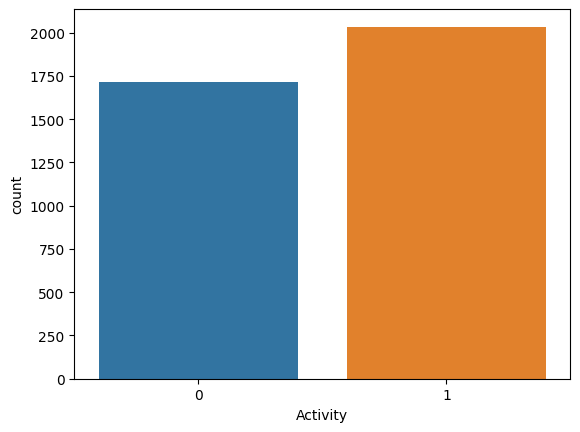

In [ ]:
sns.countplot(x = 'Activity', data = df)
print(df['Activity'].value_counts())

**Potentiellement scale le dataset**

In [ ]:
m = (df.std()**2) > 0.001

df = df.loc[:,m.reindex(df.columns, axis=1, fill_value=True)]
df.shape

(3751, 1560)

<ipython-input-6-fcfec70841f0>:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots()


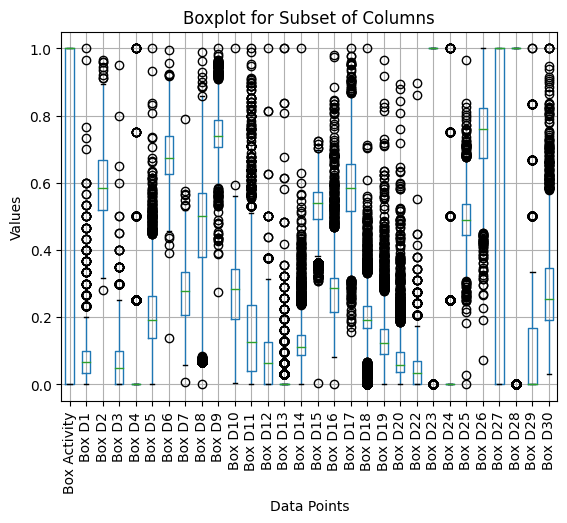

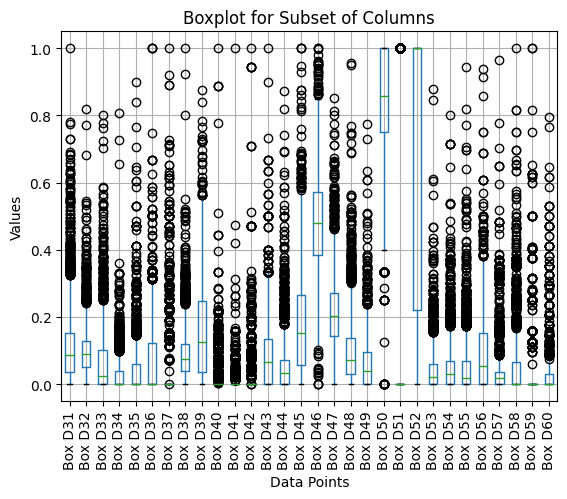

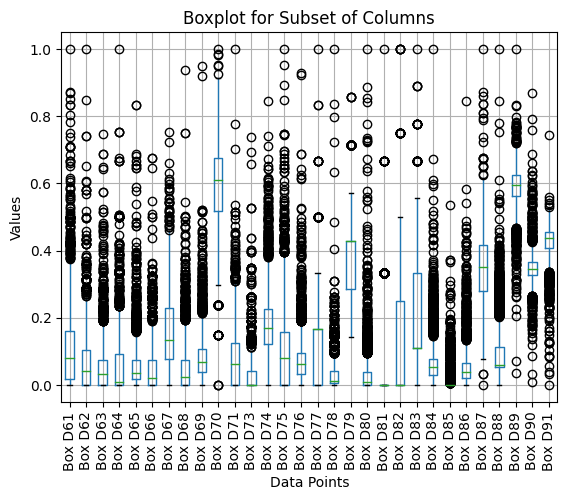

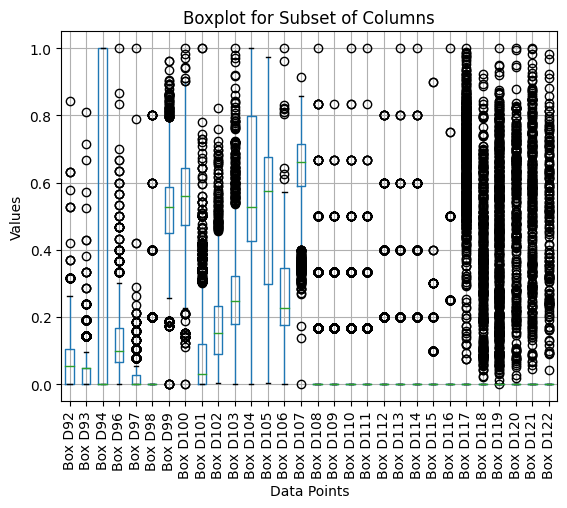

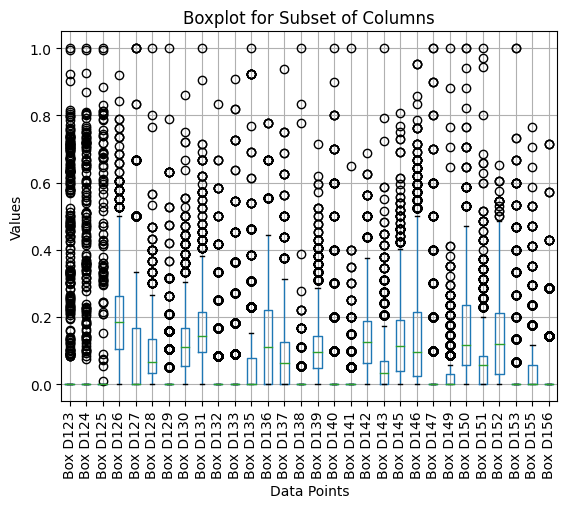

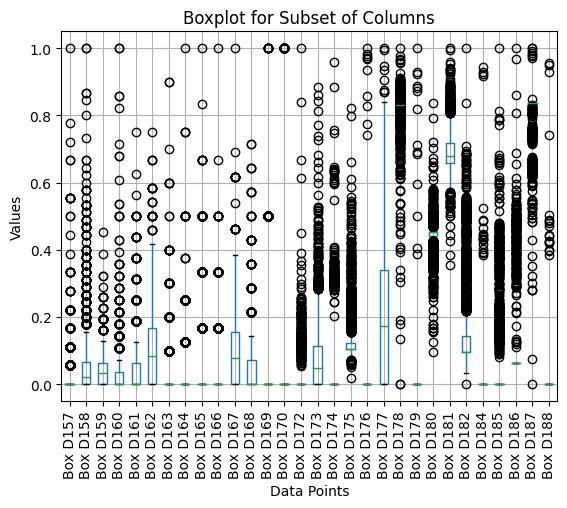

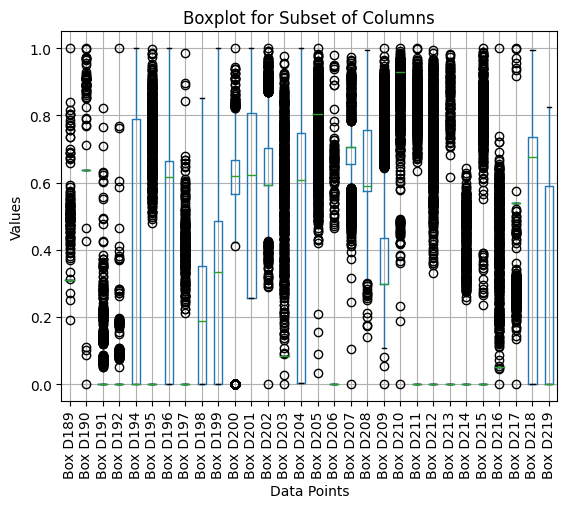

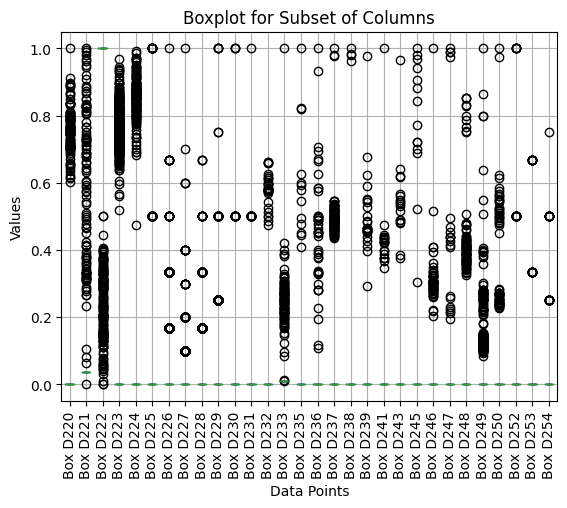

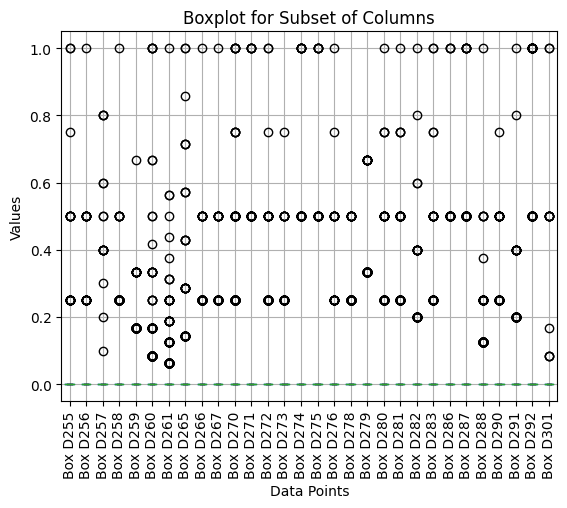

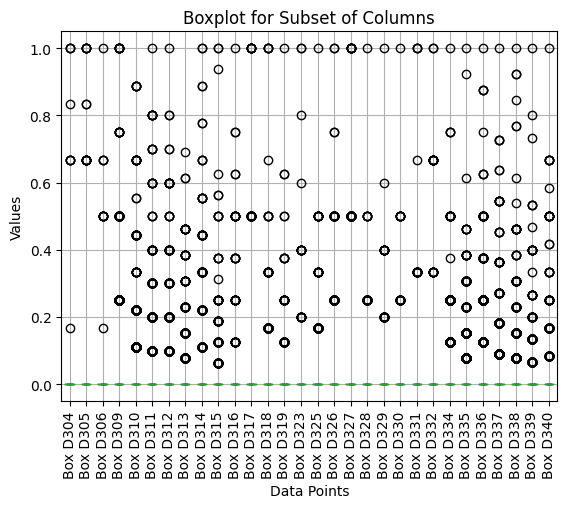

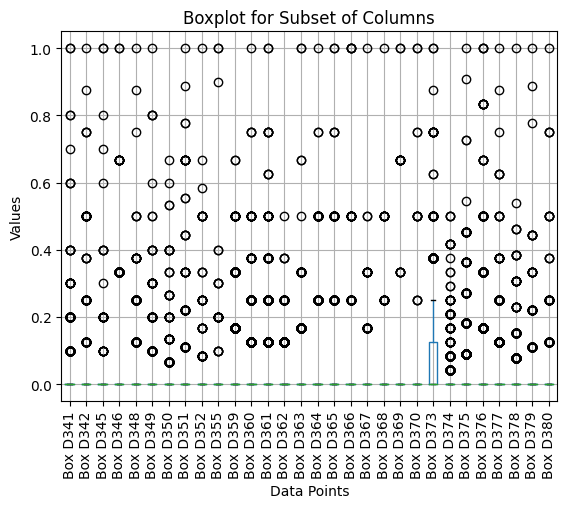

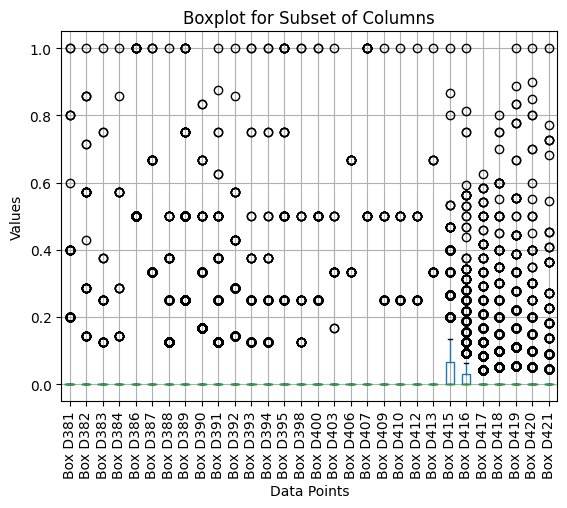

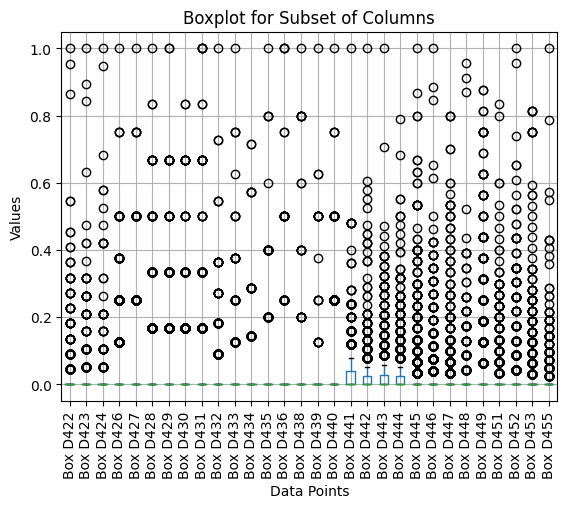

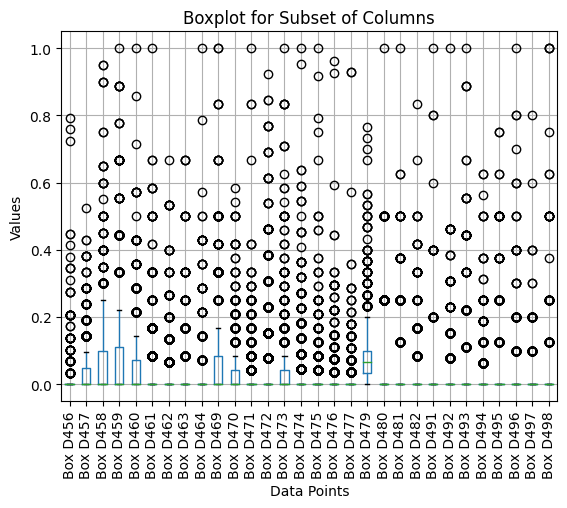

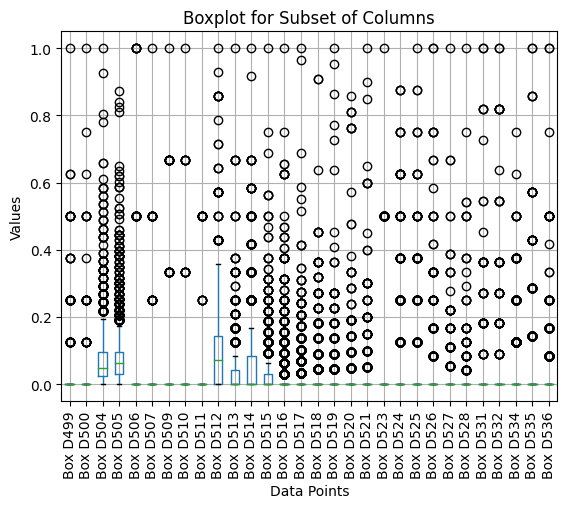

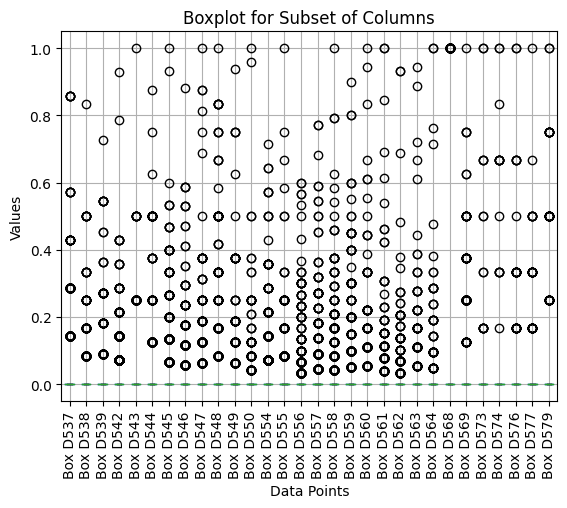

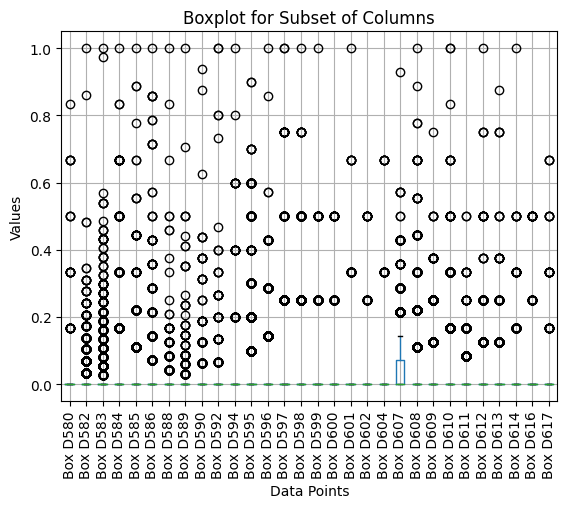

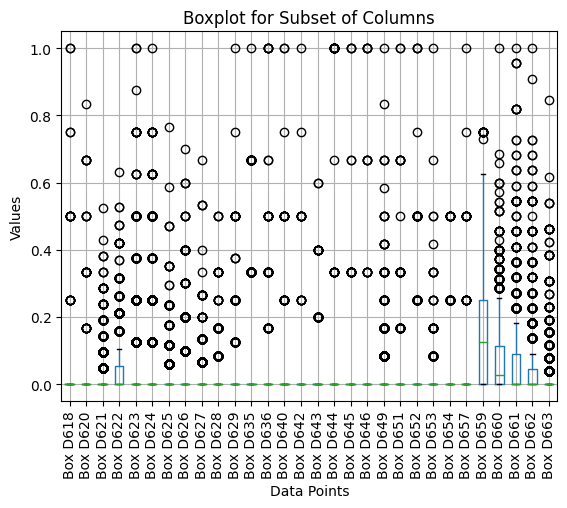

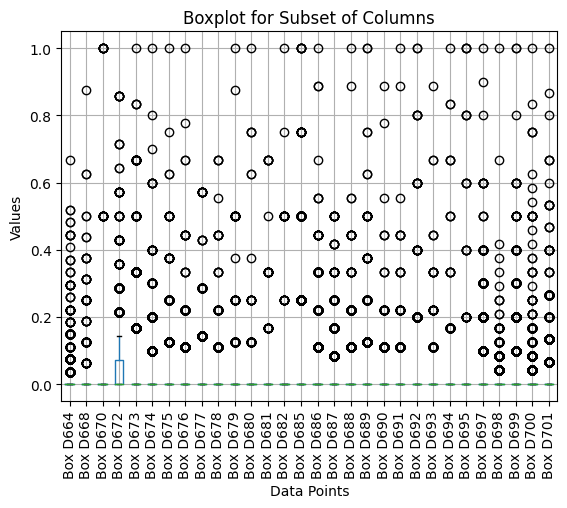

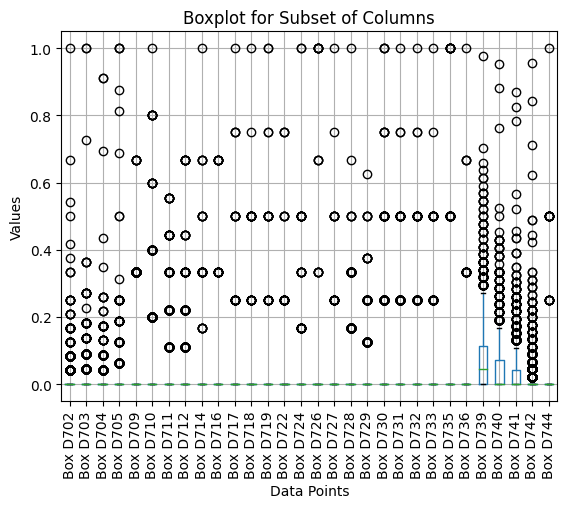

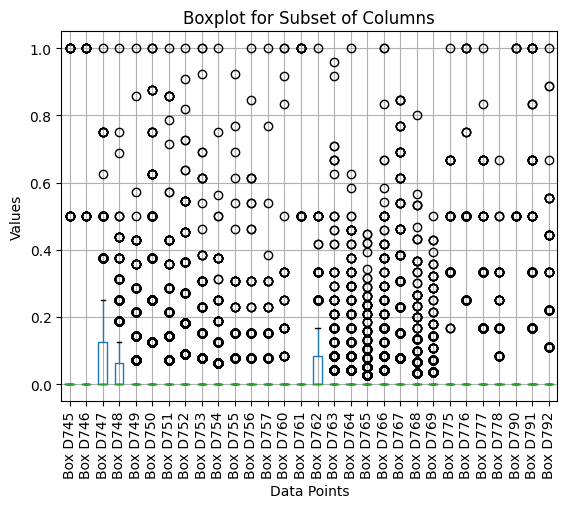

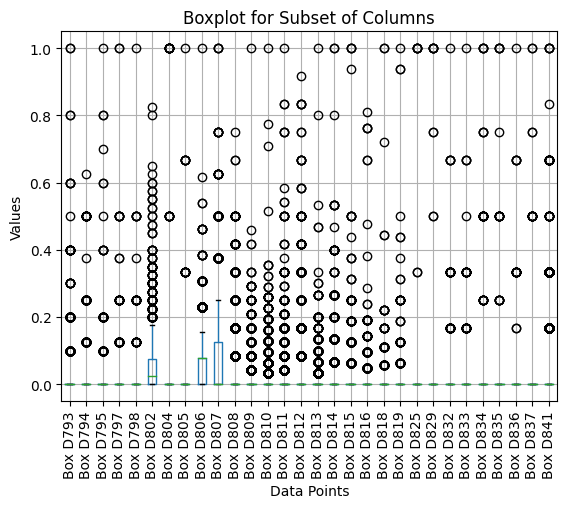

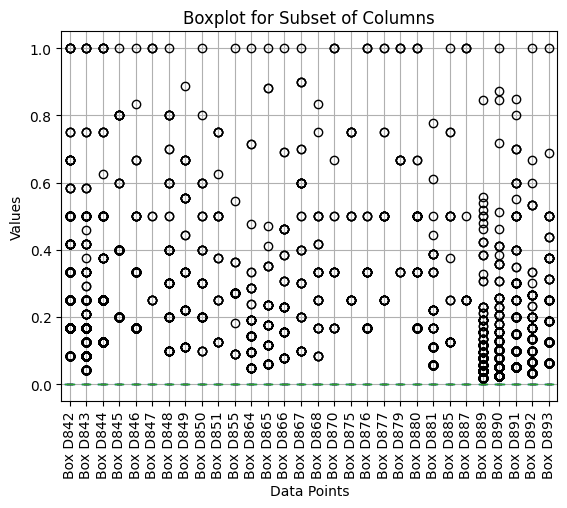

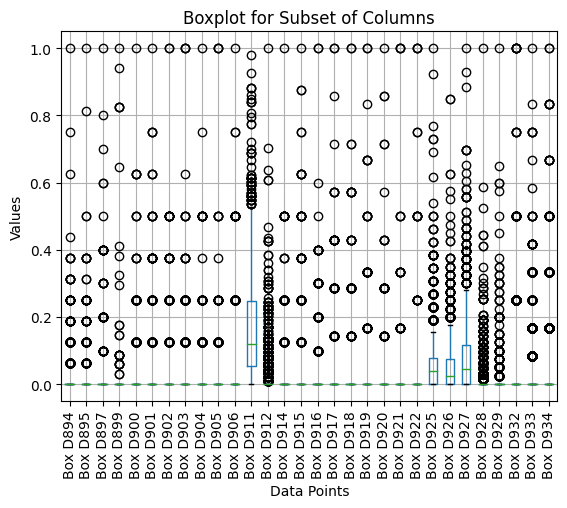

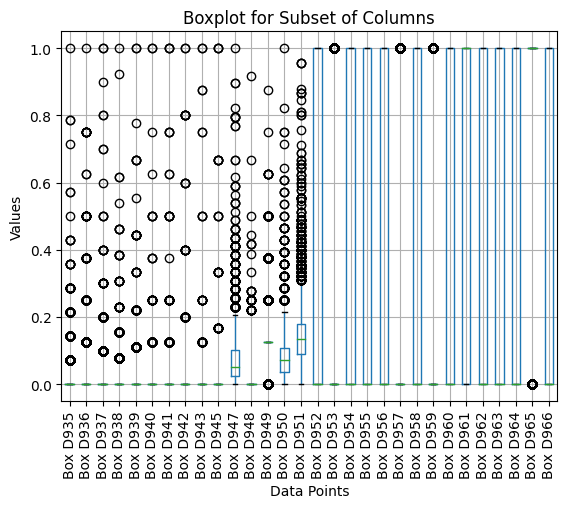

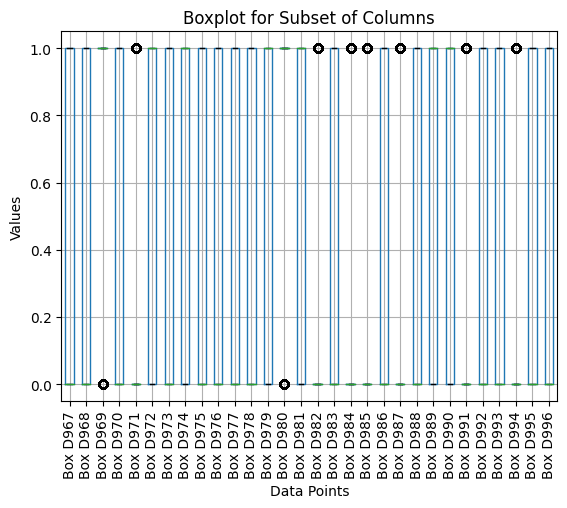

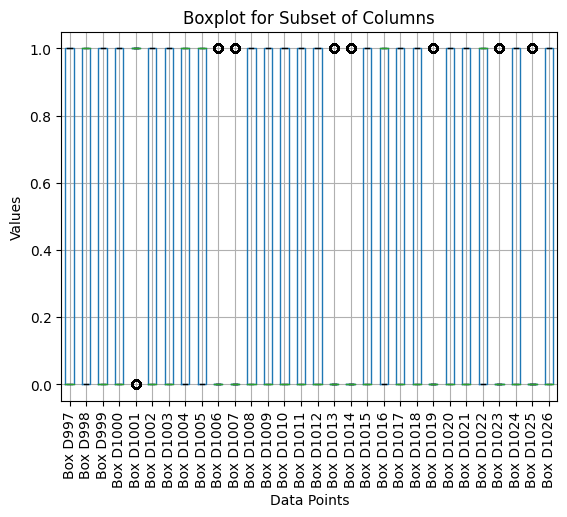

KeyboardInterrupt: ignored

In [ ]:
for i in range(0, df.shape[1], 30):
    columns = list(df.columns[i:i + 30])

    # Create a figure and subplot
    fig, ax = plt.subplots()

    # Create the boxplot for the selected columns
    df[columns].boxplot(ax=ax)

    # Customize labels and title
    ax.set_xticklabels([f'Box {str(i)}' for i in columns], rotation=90)
    plt.title('Boxplot for Subset of Columns')
    plt.xlabel('Data Points')
    plt.ylabel('Values')

# Adjust layout and display the plots
plt.tight_layout()
plt.show()

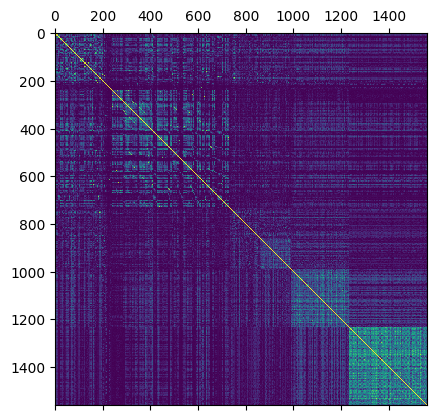

In [ ]:
correlation_matrix = df.corr().abs()
plt.matshow(correlation_matrix)
plt.show()

In [ ]:
# Calculate the correlation matrix
#correlation_matrix = df.corr()

# Set a correlation threshold (e.g., 0.9)
threshold = 0.9 #previously set to 0.8

# Create a mask for highly correlated features
mask = (correlation_matrix >= threshold) & (correlation_matrix < 1.0)
# Iterate through columns and remove one of the correlated features
features_to_remove = set()
for col in mask.columns:
    correlated_cols = mask.index[mask[col]].tolist()
    if correlated_cols:
        features_to_remove.add(col)

# Remove the highly correlated features
df_filtered = df.drop(columns=features_to_remove)

In [ ]:
df_filtered.shape
#df.plot(kind='bar', x=[0,1], y=, legend=False)
#plt.show()
#df_filtered['Activity'].value_counts()

(3751, 1534)

### ACP

" Drop the redundant columns\ndf_filtered2 = df_filtered.drop(df_filtered.columns[redundant_components], axis=1)\n\n#print(df_filtered2)\ndf_filtered2.shape\n\nplt.scatter(projected[:, 0], projected[:, 1],\n             edgecolor='none', alpha=0.5,\n            c = df_filtered.Activity,\n            cmap=plt.cm.get_cmap('viridis', 2))\nplt.xlabel('component 1')\nplt.ylabel('component 2')\nplt.colorbar();"

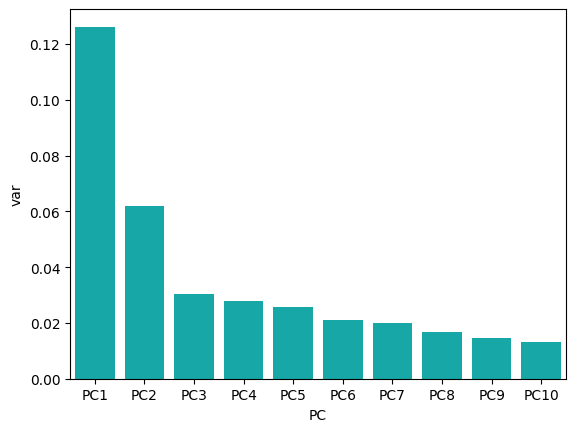

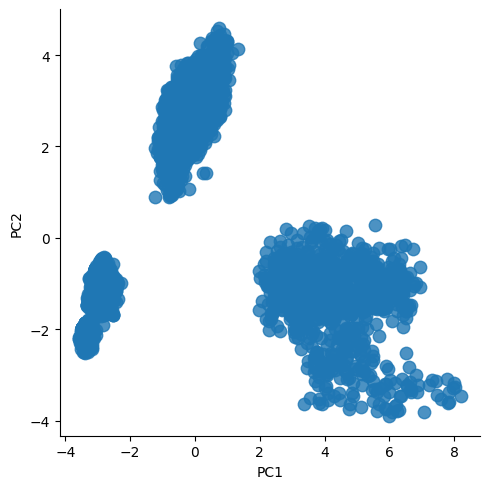

In [ ]:
from sklearn.preprocessing import MinMaxScaler
df_cleaned = pd.read_csv('df_cleaned.csv')
# Initialize PCA with the number of components equal to the number of columns
pca = PCA(n_components=10)# Un peu trop grand non ?

X_cleaned = df_cleaned.drop('Activity', axis=1)
# Scaling :
scaler = MinMaxScaler()

# Fit and transform the data using Min-Max scaling
X_cleaned = scaler.fit_transform(X_cleaned)



# Fit PCA to the data
projected = pca.fit_transform(X_cleaned)

df = pd.DataFrame({'var':pca.explained_variance_ratio_,
             'PC':['PC1','PC2','PC3','PC4','PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10']})

df2 = pd.DataFrame(data = projected,
             columns=['PC1','PC2','PC3','PC4','PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10'])

sns.barplot(x='PC',y="var",
           data=df, color="c");

# Calculate the explained variance ratio for each component
explained_variance_ratio = pca.explained_variance_ratio_

# Find the components that have small explained variance (indicating redundancy)
redundant_components = [i for i, ratio in enumerate(explained_variance_ratio) if ratio < 0.0001]

sns.lmplot( x="PC1", y="PC2",
  data=df2,
  fit_reg=False,
  legend=True,
  scatter_kws={"s": 80})


""" Drop the redundant columns
df_filtered2 = df_filtered.drop(df_filtered.columns[redundant_components], axis=1)

#print(df_filtered2)
df_filtered2.shape

plt.scatter(projected[:, 0], projected[:, 1],
             edgecolor='none', alpha=0.5,
            c = df_filtered.Activity,
            cmap=plt.cm.get_cmap('viridis', 2))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar();"""


### Création des jeux de données d'apprentissage et de test

In [ ]:
from sklearn.preprocessing import MinMaxScaler

rd.seed(10)
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical

#df_cleaned = pd.read_csv('df_cleaned.csv')


y = (df_filtered.Activity)
X = df_filtered.drop('Activity', axis = 1)
# Scaling :
#scaler = MinMaxScaler()

# Fit and transform the data using Min-Max scaling
#X_scaled = scaler.fit_transform(X)
#X_scaled = pd.DataFrame(X_scaled, columns = X.columns)# without the activity label

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=3, shuffle=True)
X_train.to_csv("X_train_30.csv", index=True)
X_test.to_csv("X_test_30.csv", index=True)
y_train.to_csv("y_train_30.csv", index=True)
y_test.to_csv("y_test_30.csv", index=True)
X_train.shape

(2625, 1533)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
df_jpp = pd.read_csv("df_cleaned_39.csv", index_col=0)
X_old_train = pd.read_csv("X_train_30.csv", index_col=0)
indices_train = X_old_train.index
X_old_test = pd.read_csv("X_test_30.csv", index_col=0)
indices_test = X_old_test.index

scaler = MinMaxScaler()

# Fit and transform the data using Min-Max scaling



X_f = df_jpp.drop('Activity', axis = 1)
Y_f = df_jpp.Activity
X_scaled = scaler.fit_transform(X_f)
X_scaled = pd.DataFrame(X_scaled, columns = X_f.columns)# without the activity label

X_train_f = X_scaled.loc[indices_train]
X_test_f = X_scaled.loc[indices_test]
print(X_train_f.columns)
X_train_f.to_csv("X_train_final_30.csv", index=True)
X_test_f.to_csv("X_test_final_30.csv", index=True)


Index(['D1', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7', 'D8', 'D9', 'D10',
       ...
       'D1767', 'D1768', 'D1769', 'D1770', 'D1771', 'D1772', 'D1773', 'D1774',
       'D1775', 'D1776'],
      dtype='object', length=1533)


In [ ]:
t1 = pd.read_csv("X_train_final_30.csv", index_col = 0)
t2 = pd.read_csv("X_train_30.csv", index_col = 0)
print(t1.head(5))
print(t2.head(5))

            D1        D2        D3   D4        D5        D6        D7  \
446   0.000000  0.405285  0.000000  0.0  0.232394  0.549614  0.499661   
898   0.033300  0.366042  0.052632  0.0  0.320752  0.520035  0.508126   
1516  0.166667  0.721101  0.157895  0.0  0.244243  0.457166  0.536696   
1611  0.100000  0.483913  0.157895  0.0  0.223255  0.703650  0.239442   
2751  0.033300  0.242845  0.000000  0.0  0.124720  0.562696  0.474895   

            D8        D9       D10  ...  D1767  D1768  D1769  D1770  D1771  \
446   0.610070  0.615731  0.344856  ...    0.0    0.0    0.0    0.0    0.0   
898   0.068494  0.536920  0.353914  ...    0.0    0.0    0.0    0.0    0.0   
1516  0.362134  0.443863  0.434780  ...    0.0    0.0    0.0    0.0    0.0   
1611  0.511830  0.685041  0.168628  ...    0.0    0.0    0.0    0.0    0.0   
2751  0.580847  0.639110  0.331012  ...    0.0    0.0    0.0    0.0    0.0   

      D1772  D1773  D1774  D1775  D1776  
446     0.0    0.0    0.0    0.0    0.0  
898     

In [ ]:
# Saving the full df cleaned
df_filtered.to_csv("df_cleaned_39.csv")


In [ ]:
"""y = (df_filtered2.Activity)
X = df_filtered2.drop('Activity', axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=3, shuffle=1)
X_train.to_csv("X_train_2.csv")
X_test.to_csv("X_test_2.csv")
y_train.to_csv("y_train_2.csv")
y_test.to_csv("y_test_2.csv")"""

In [ ]:
# Initialize PCA with the number of components you want to keep (e.g., 2)
n_components = 2
pca = PCA(n_components=n_components)

# Fit and transform the entire data
X_pca = pca.fit_transform(X_train)

# Transform the test data using the same PCA model
X_test_pca = pca.transform(X_test)

# Create a DataFrame for the PCA results of the test data
pca_test_df = pd.DataFrame(data=X_test_pca, columns=[f'PC{i+1}' for i in range(n_components)])

# Plot all points and color only the test points differently
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c='gray', label='Training Data')
plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c='b', label='Test Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of All Data with Test Data Highlighted')
plt.legend()
plt.grid(True)
plt.show()


NameError: ignored

In [ ]:
# Reloading datasets :
# First dataset :
X_train = pd.read_csv("X_train_1.csv")
print(X_train.shape)
y_train = pd.read_csv("y_train_1.csv", index_col=[0])
print(y_train.shape)

(2813, 1112)
(2813, 1)


<Axes: xlabel='Activity', ylabel='count'>

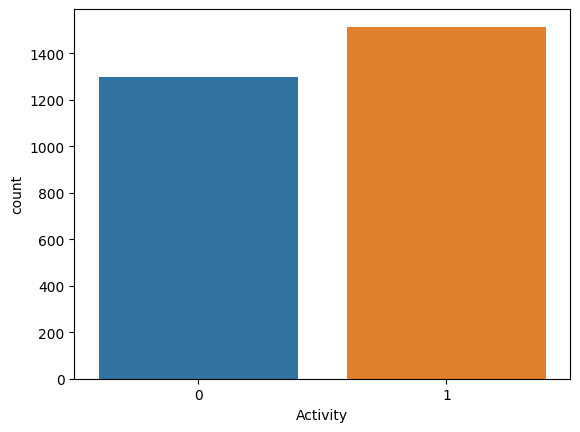

In [ ]:
sns.countplot(x = 'Activity', data = y_train)

## Régression logistique

In [ ]:
#import
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_auc_score, f1_score

In [ ]:
# Entraînement d'un modèle de régression logistique
model = LogisticRegression()
model.fit(X_train, y_train)

In [ ]:
# Prédictions sur l'ensemble de test
y_pred = model.predict(X_test)

In [ ]:
# Probabilités
probabilities = model.predict_proba(X_test)

In [ ]:
# Évaluation du modèle
accuracy = accuracy_score(y_test, y_pred)
print("Précision du modèle : {:.2f}%".format(accuracy * 100))
print("Matrice de confusion:")
print(confusion_matrix(y_test, y_pred))
print("\nRapport de classification:")
print(classification_report(y_test, y_pred))

In [ ]:
# Calculer la ROC AUC
roc_auc = roc_auc_score(y_test, probabilities[:, 1])
print(f'ROC AUC: {roc_auc:.2f}')

In [ ]:
# Prédiction
results = pd.DataFrame({'Index': index, 'Prediction': y_pred})
results.to_csv('YPred_models/y_pred_logistic-regression_71.csv', index=False)

In [ ]:
# Probabilités
results2 = pd.DataFrame({'Index': index, 'Probabilities': probabilities[:, 1]})  # Probabilités de la classe 1
results2.to_csv('YPred_models/y_pred_prob_logistic-regression_71.csv', index=False)

In [ ]:
# Calculer la matrice de confusion et extraire les valeurs de la matrice de confusion
confusion = confusion_matrix(y_test, y_pred)
TN, FP, FN, TP = confusion.ravel()

sensibility = TP / (TP + FN)
specificity = TN / (TN + FP)
f1_logistic = f1_score(y_test, y_pred)
mcc_logistic = matthews_corrcoef(y_test, y_pred)

# Afficher les métriques
print("Régression Logistique Metrics:")
print(f'Sensibilité (Recall): {sensibility:.2f}')
print(f'Spécificité: {specificity:.2f}')
print(f'F1-score: {f1_logistic:.2f}')

## Random Forest

In [ ]:
# First dataset :
X_train = pd.read_csv("X_train_final_30.csv")
X_train = X_train.set_index(X_train.columns[0])
print(X_train.shape)
y_train = pd.read_csv("y_train_30.csv")
y_train = y_train.set_index(y_train.columns[0])
print(y_train.shape)
X_test = pd.read_csv("X_test_final_30.csv")
X_test = X_test.set_index(X_test.columns[0])
y_test = pd.read_csv("y_test_30.csv")
y_test = y_test.set_index(y_test.columns[0])
#y_test = y_test.drop(y_test.columns[0], axis =1)

y_train.columns
y_test.columns



(2625, 1533)
(2625, 1)


Index(['Activity'], dtype='object')

In [ ]:
#Create random forest classifier
clf = RandomForestClassifier(n_estimators=150, random_state=42)
clf.fit(X_train, y_train.values.ravel())


RandomForestClassifier(n_estimators=150, random_state=42)

In [ ]:
#Predict on test data
y_pred = clf.predict_proba(X_test)
y_pred_2 = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_2)
print(accuracy)

0.8152753108348135


In [ ]:
y_pred_df = pd.DataFrame(y_pred, columns = ["0", "1"])
y_pred_df.to_csv("YPred_models/random_forest.csv")

In [ ]:
#Display the first 3 trees
for i in range(3):
    tree = clf.estimators_[i]
    dot_data = export_graphviz(tree,
                               feature_names=X_train.columns,
                               filled=True,
                               max_depth=2,
                               impurity=False,
                               proportion=True)
    graph = graphviz.Source(dot_data)
    display(graph)

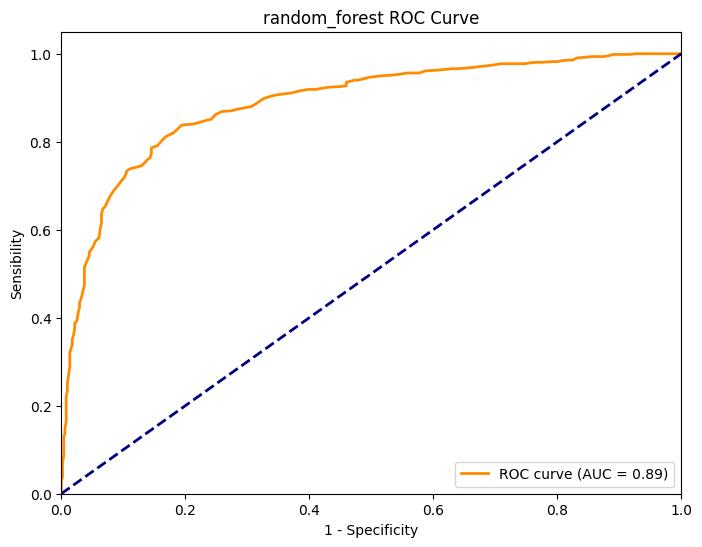

In [ ]:
# ROC curve
from sklearn.metrics import roc_curve, auc

fpr, tpr, _ = roc_curve(y_test, y_pred_df["1"].values)
roc_auc = auc(fpr, tpr)


plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1 - Specificity')
plt.ylabel('Sensibility')
plt.title('random_forest ROC Curve')
plt.legend(loc='lower right')
plt.savefig('Figures/random_forest_ROC.png',  dpi=500)
plt.show()

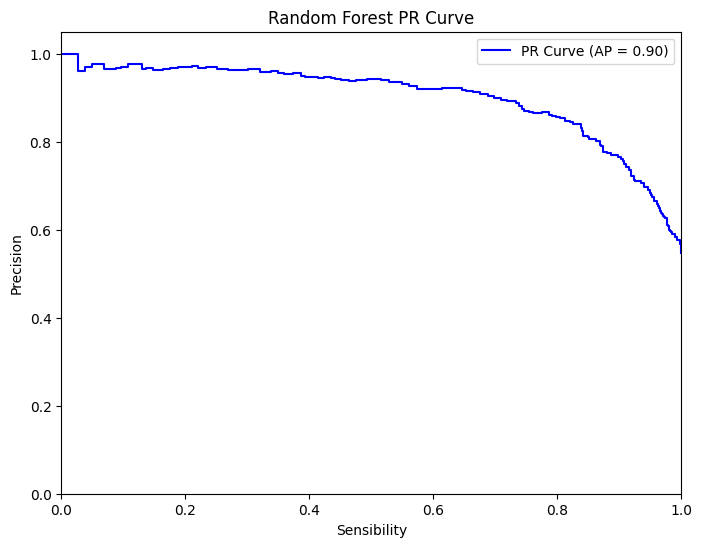

In [ ]:
# PR curve :
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score

precision, recall, _ = precision_recall_curve(y_test, y_pred_df["1"].values)

average_precision = average_precision_score(y_test, y_pred_df["1"].values)

# Plot PR curve
plt.figure(figsize=(8, 6))
plt.step(recall, precision, color='b', where='post', label=f'PR Curve (AP = {average_precision:.2f})')
plt.xlabel('Sensibility')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Random Forest PR Curve')
plt.legend(loc='upper right')
plt.show()

[[399 110]
 [ 98 519]]
Accuracy:0.82


Text(45.722222222222214, 0.5, 'Obs')

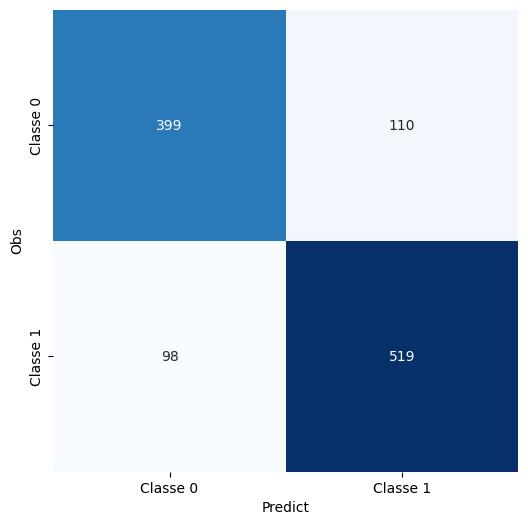

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_2)
print(cm)
tot = cm[0][0]+cm[1][1] + cm[0][1]+cm[1][0]
accuracy = (cm[0][0]+cm[1][1]) /tot
print(f"Accuracy:{accuracy:.2f}")
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Classe 0', 'Classe 1'], yticklabels=['Classe 0', 'Classe 1'])
plt.xlabel('Predict')
plt.ylabel('Obs')

In [ ]:
# Calculate F1-Score
from sklearn.metrics import f1_score
f1 = f1_score(y_test, y_pred_2)
print("F1-Score:", f1)

# MCC
from sklearn.metrics import matthews_corrcoef
mcc = matthews_corrcoef(y_test, y_pred_2)
print("MCC:", mcc)

# Sensibility :
from sklearn.metrics import recall_score
sensitivity = recall_score(y_test, y_pred_2)

print("Sensibilité", sensitivity)

# Calculate Specificity
specificity = cm[0, 0] / (cm[0, 0] + cm[0, 1])

print("Specificity:", specificity)

F1-Score: 0.8330658105939005
MCC: 0.6264948736938736
Sensibilité 0.8411669367909238
Specificity: 0.7838899803536346


### Soumission Kaggle

In [ ]:
kaggle_file = pd.read_csv("test.csv")
kaggle_file.head(5)

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

# Fit and transform the data using Min-Max scaling


cols = X_train.columns

kaggle_file = kaggle_file[cols]
kaggle_file.shape

X_scaled = scaler.fit_transform(kaggle_file)
X_scaled = pd.DataFrame(X_scaled, columns = kaggle_file.columns)

ypred_kaggle_proba = clf.predict_proba(X_scaled)
y_pred_kaggle_df = pd.DataFrame(ypred_kaggle_proba, columns = ["0", "1"])
y_pred_kaggle_df['moleculeId']= y_pred_kaggle_df.index
y_pred_kaggle_df['moleculeId'] +=1
column_to_move = y_pred_kaggle_df.pop("moleculeId")
y_pred_kaggle_df.insert(0, "moleculeId", column_to_move)
y_pred_kaggle_df.pop("0")
y_pred_kaggle_df.columns = ["moleculeId","PredictedProbability"]
y_pred_kaggle_df.head(5)
y_pred_kaggle_df.to_csv("YPred_models/kaggle_random_forest.csv", index = False)

## Gradient Boosting

Les réseaux de neurones profonds sont adaptés aux données complexes et non structurées, comme les images, le texte et le son. Ils ont montré des performances exceptionnelles dans des domaines tels que la vision par ordinateur, le traitement du langage naturel et la recommandation. Gradient Boosting n'est pas du deep learning c'est une technique d'ensemble en apprentissage automatique. Utiliser des bibliothèques telles que Scikit-Learn ou XGBoost. Le Gradient Boosting est une méthode d'ensemble qui combine plusieurs modèles faibles (généralement des arbres de décision peu profonds) pour former un modèle fort. L'idée fondamentale derrière le Gradient Boosting est d'ajuster itérativement les modèles faibles pour corriger les erreurs faites par les modèles précédents. Cela se fait en minimisant la perte (ou l'erreur) entre les prédictions du modèle actuel et les vraies valeurs cibles.


Utiliser la classe GradientBoostingClassifier de scikit-learn, qui est une implémentation de Gradient Boosting. Donc, le modèle créé dans ce code est basé sur l'algorithme de Gradient Boosting.

In [ ]:
# Import
import pandas as pd
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_auc_score, f1_score

In [ ]:
# Créer un modèle Gradient Boosting
model = GradientBoostingClassifier()

In [ ]:
# Entraîner le modèle sur les données d'entraînement
model.fit(X_train, y_train)

In [ ]:
# Prédire les probabilités des étiquettes pour les données de test
probabilities = model.predict_proba(X_test)

In [ ]:
# Prédire avec le modèle
predictions = model.predict(X_test)

In [ ]:
# Calculer l'accuracy sur les données de test
accuracy = accuracy_score(y_test, predictions)
print(f'Accuracy: {accuracy:.2f}')

In [ ]:
# Prediction
results = pd.DataFrame({'Index': X_test['Unnamed: 0'], 'Prediction': predictions})
results.to_csv('YPred_models/y_pred_gradient-boosting_80.csv', index=False)

In [ ]:
# Probabilité
results1 = pd.DataFrame({'Index': X_test['Unnamed: 0'], 'Probabilities': probabilities[:, 1]}) # pour obtenir les probabilités de la classe 1
results1.to_csv('YPred_models/y_pred_prob_gradient-boosting_80.csv', index=False)

In [ ]:
# courbe roc
roc_auc = roc_auc_score(y_test, probabilities[:, 1])
print(f'ROC AUC: {roc_auc:.2f}')

In [ ]:
# Calculer la matrice de confusion et extraire les valeurs
confusion = confusion_matrix(y_test, predictions)
TN, FP, FN, TP = confusion.ravel()

sensibility = TP / (TP + FN)
specificity = TN / (TN + FP)
f1_gradient_boosting = f1_score(y_test, predictions)

# Afficher les métriques
print("Gradient Boosting Metrics:")
print(f'Sensibilité (Recall): {sensibility:.2f}')
print(f'Spécificité: {specificity:.2f}')
print(f'F1-score: {f1_gradient_boosting:.2f}')

In [ ]:
import pandas as pd
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_auc_score, f1_score, roc_curve, auc
import matplotlib.pyplot as plt


# Prédire les probabilités des étiquettes pour les données de test
probabilities = model.predict_proba(X_test)[:, 1]  # Probabilités de la classe positive

# Calculer la courbe ROC
fpr, tpr, thresholds = roc_curve(y_test, probabilities)

# Calculer l'aire sous la courbe ROC (AUC)
roc_auc = auc(fpr, tpr)

# Tracer la courbe ROC
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='Courbe ROC (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taux de Faux Positifs (1 - Spécificité)')
plt.ylabel('Taux de Vrais Positifs (Sensibilité)')
plt.title('Courbe ROC')
plt.legend(loc="lower right")
plt.show()

## XGBoost

In [ ]:
!pip install xgboost
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
import time
from sklearn.metrics import classification_report, auc, roc_curve, accuracy_score, confusion_matrix, f1_score

In [ ]:
param_grid ={
    'max_depth':[3,4,5],
    'learning_rate':[0.01,0.1,0.2],
    'n_estimators':[100,200,300]
}

model=XGBClassifier()
grid_search=GridSearchCV(model,param_grid,cv=5,n_jobs=1,verbose=2)

In [ ]:
start_time = time.time()
grid_search.fit(X_train,y_train)
execution_time=time.time() - start_time

print("best param ", grid_search.best_params_)
print(f"temps exécution {execution_time} ")

In [ ]:
best_model = grid_search.best_estimator_
y_train_pred=best_model.predict(X_train)
y_test_pred=best_model.predict(X_test)
y_test_pred_prob = best_model.predict_proba(X_test)[:, 1]

# les prédictions dans un fichier CSV
results = pd.DataFrame({'Index': index, 'Prediction': y_test_pred})
results.to_csv('YPred_models/y_pred_xgboost_80.csv', index=False)

# les probabilités dans un autre fichier CSV
results1 = pd.DataFrame({'Index': index, 'Probabilities': y_test_pred_prob})
results1.to_csv('YPred_models/y_pred_prob_xgboost_80.csv', index=False)

In [ ]:
print(classification_report(y_train, y_train_pred))
print(classification_report(y_test, y_test_pred))

In [ ]:
# courbe roc pour test
y_train_pred_prob = best_model.predict_proba(X_train)[:,1]
y_test_pred_prob = best_model.predict_proba(X_test)[:,1]

fpr_test, tpr_test, _ = roc_curve(y_test, y_test_pred_prob)
roc_auc_test = auc(fpr_test, tpr_test)

# courbe roc pour train
fpr_train, tpr_train, _ = roc_curve(y_train, y_train_pred_prob)
roc_auc_train = auc(fpr_train, tpr_train)

# affichage
plt.figure()
plt.plot(fpr_test, tpr_test, color='darkorange', lw=2, label='ROC curve(area = %0.2f) Test' % roc_auc_test)
plt.plot(fpr_train, tpr_train, color='blue', lw=2, label='ROC curve(area = %0.2f) Train' % roc_auc_train)
plt.plot([0,1], [0,1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("Ttrue Positive Rate")
plt.title("Receiver operating caracteristic example")
plt.legend(loc="lower right")
plt.show()

In [ ]:
accuracy_test = accuracy_score(y_test, y_test_pred)

# Calculer la matrice de confusion et extraire les valeurs
confusion_test = confusion_matrix(y_test, y_test_pred)
TN_test, FP_test, FN_test, TP_test = confusion_test.ravel()

# Calculer la sensibilité et la spécificité
sensibility_test = TP_test / (TP_test + FN_test)
specificity_test = TN_test / (TN_test + FP_test)

# Calculer le F1-score
f1_test = f1_score(y_test, y_test_pred)

# Afficher les métriques
print("Test Accuracy:", accuracy_test)
print("Test Sensitivity (Recall):", sensibility_test)
print("Test Specificity:", specificity_test)
print("Test F1-score:", f1_test)

## CNN

In [ ]:
# First dataset :
X_train = pd.read_csv("X_train_final_30.csv", index_col=0)
y_train = pd.read_csv("y_train_30.csv")
# Storing the indices :
indices = y_train["Unnamed: 0"]
y_train = pd.read_csv("y_train_30.csv", index_col=0)




(2625, 1533)
(2625, 1)
0        446
1        898
2       1516
3       1611
4       2751
        ... 
2620    3000
2621    1667
2622    3321
2623    1688
2624    1898
Name: Unnamed: 0, Length: 2625, dtype: int64


In [ ]:
model = Sequential()

model.add(Conv1D (kernel_size = 3, filters = 78, input_shape=(1533,1)))
model.add(Activation('relu'))
model.add(MaxPooling1D(pool_size = 2))
model.add(Dropout(0.5))

model.add(Conv1D (kernel_size = 2, filters = 100))
model.add(Activation('relu'))
model.add(MaxPooling1D(pool_size =2))


model.add(Conv1D(kernel_size =2, filters = 128))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling1D(pool_size =2))
model.add(Dropout(0.5))

model.add(Flatten())

model.add(Dense(1, activation = 'sigmoid'))
model.compile( loss='binary_crossentropy', optimizer=keras.optimizers.Adam(learning_rate=0.001), metrics=['accuracy'])
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 1531, 78)          312       
                                                                 
 activation (Activation)     (None, 1531, 78)          0         
                                                                 
 max_pooling1d (MaxPooling1  (None, 765, 78)           0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 765, 78)           0         
                                                                 
 conv1d_1 (Conv1D)           (None, 764, 100)          15700     
                                                                 
 activation_1 (Activation)   (None, 764, 100)          0         
                                                        

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping,ReduceLROnPlateau
# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss',
                              min_delta=0,
                              patience=2,
                              verbose=0, mode='auto', restore_best_weights=True)  # Stop training after 5 epochs of no improvement in validation loss
# reduce_lr = ReduceLROnPlateau(monitor='val_accuracy',  # Metric to be monitored
#                               factor=0.5,          # Factor by which the learning rate will be reduced (new_lr = lr * factor)
#                               patience=10,          # Number of epochs with no improvement after which learning rate will be reduced
#                               min_lr=1e-7,         # Lower bound on the learning rate
#                               verbose=1)
model_train = model.fit(X_train, y_train, batch_size=100,epochs=40,verbose=1, validation_split=0.2, callbacks=[early_stopping]) #


Epoch 1/40
21/21 [==============================] - 20s 854ms/step - loss: 1.3869 - accuracy: 0.5186 - val_loss: 0.6930 - val_accuracy: 0.4648
Epoch 2/40
21/21 [==============================] - 31s 2s/step - loss: 0.7351 - accuracy: 0.5871 - val_loss: 0.6919 - val_accuracy: 0.6971
Epoch 3/40
21/21 [==============================] - 28s 1s/step - loss: 0.6511 - accuracy: 0.6343 - val_loss: 0.6907 - val_accuracy: 0.7181
Epoch 4/40
21/21 [==============================] - 17s 815ms/step - loss: 0.6185 - accuracy: 0.6681 - val_loss: 0.6884 - val_accuracy: 0.7257
Epoch 5/40
21/21 [==============================] - 25s 1s/step - loss: 0.5964 - accuracy: 0.6948 - val_loss: 0.6841 - val_accuracy: 0.7810
Epoch 6/40
21/21 [==============================] - 23s 1s/step - loss: 0.5661 - accuracy: 0.7133 - val_loss: 0.6801 - val_accuracy: 0.7695
Epoch 7/40
21/21 [==============================] - 18s 852ms/step - loss: 0.5628 - accuracy: 0.7214 - val_loss: 0.6774 - val_accuracy: 0.7752
Epoch 8/40


In [ ]:
from keras.utils import plot_model
import pydot
# Générer le plot du modèle au format SVG
plot_model(model, to_file='Figures/model_CNN.png', show_shapes=True, show_layer_names=True, rankdir='TB',dpi=1000)

36/36 [==============================] - 0s 8ms/step
[[346 163]
 [ 79 538]]
Accuracy:0.79


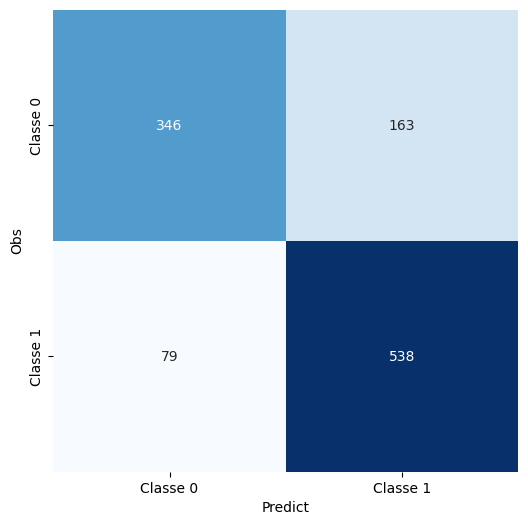

In [ ]:
# perfs sur le test:

X_test = pd.read_csv("X_test_final_30.csv", index_col=0)
y_test = pd.read_csv("y_test_30.csv")
indices_test = y_test["Unnamed: 0"]
y_test = pd.read_csv("y_test_30.csv", index_col=0)
y_pred_test_proba = model.predict(X_test)
y_test_classes = np.where(y_pred_test_proba >= 0.5,1,0)
epsilon = 1e-5  # Small value to prevent log(0) errors
y_pred_test_proba = np.clip(y_pred_test_proba,epsilon, 1-epsilon)
y_test = y_test.values
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_test_classes)
print(cm)
tot = cm[0][0]+cm[1][1] + cm[0][1]+cm[1][0]
accuracy = (cm[0][0]+cm[1][1]) /tot
print(f"Accuracy:{accuracy:.2f}")
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Classe 0', 'Classe 1'], yticklabels=['Classe 0', 'Classe 1'])
plt.xlabel('Predict')
plt.ylabel('Obs')
plt.savefig('Figures/CNN_79_conf_matr.png',  dpi=500)
plt.show()
predictions = [1 if p>=0.5 else 0 for p in y_pred_test_proba]
# SAVE LES 0/1 PREDITS
y_pred_to_save = pd.DataFrame( predictions, indices_test)
y_pred_to_save.to_csv("YPred_models/y_pred_CNN_79.csv")
# SAVE LES PROBAS PREDITS
y_pred_prob_to_save = pd.DataFrame( y_pred_test_proba, indices_test)
y_pred_prob_to_save.to_csv("YPred_models/y_pred_prob_CNN_79.csv")

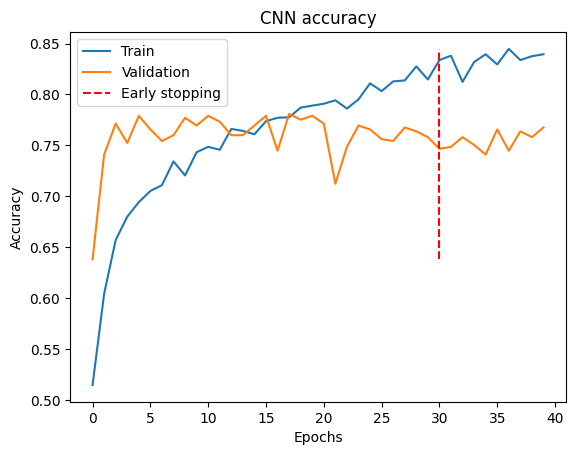

In [ ]:
# Curves Accuracy
plt.plot(model_train.history['accuracy'])
plt.plot(model_train.history['val_accuracy'])
plt.vlines(x=30, ymin=min(model_train.history['val_accuracy']), ymax=max(model_train.history['accuracy']), colors='red', linestyles='dashed', label='Early stopping')
plt.title('CNN accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation', 'Early stopping'], loc='upper left')
plt.savefig('Figures/CNN_79_acc.png',  dpi=500)
plt.show()


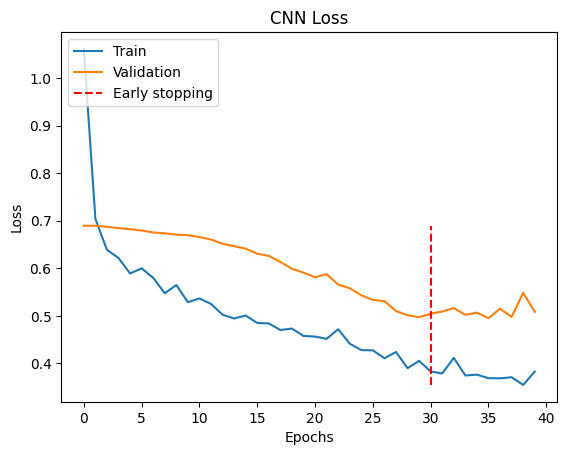

In [ ]:
# Curves loss
plt.plot(model_train.history['loss'])
plt.plot(model_train.history['val_loss'])
plt.vlines(x=30, ymin=min(model_train.history['loss']), ymax=max(model_train.history['val_loss']), colors='red', linestyles='dashed', label='Early stopping')
plt.title('CNN Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation', 'Early stopping'], loc='upper left')
plt.savefig('Figures/CNN_79_loss.png',  dpi=500)
plt.show()


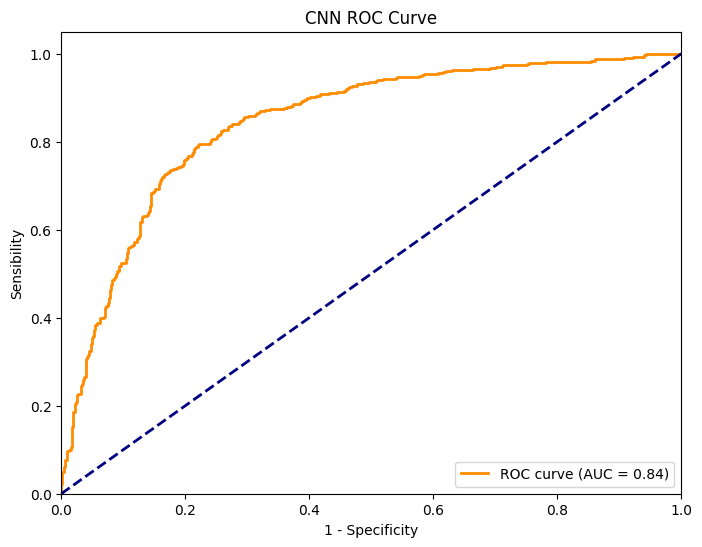

In [ ]:
# ROC curve
from sklearn.metrics import roc_curve, auc

fpr, tpr, _ = roc_curve(y_test, y_pred_test_proba)
roc_auc = auc(fpr, tpr)


plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1 - Specificity')
plt.ylabel('Sensibility')
plt.title('CNN ROC Curve')
plt.legend(loc='lower right')
plt.savefig('Figures/CNN_79_ROC.png',  dpi=500)
plt.show()

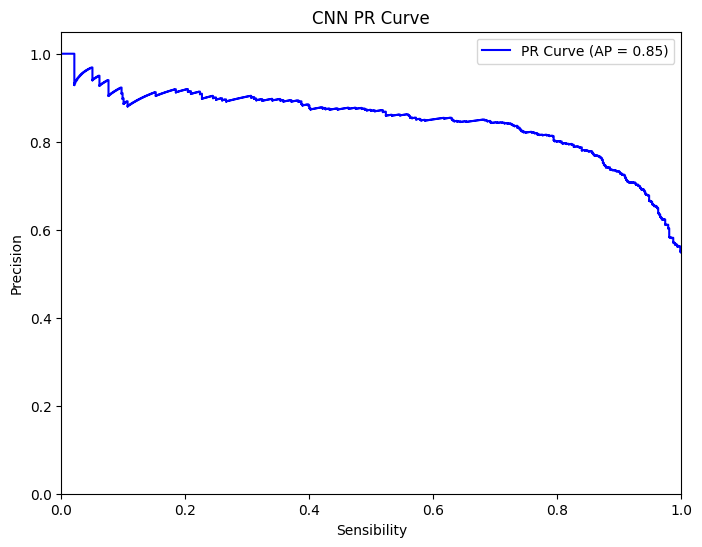

In [ ]:
# PR curve :
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score

precision, recall, _ = precision_recall_curve(y_test, y_pred_test_proba)

average_precision = average_precision_score(y_test, y_pred_test_proba)

# Plot PR curve
plt.figure(figsize=(8, 6))
plt.step(recall, precision, color='b', where='post', label=f'PR Curve (AP = {average_precision:.2f})')
plt.xlabel('Sensibility')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('CNN PR Curve')
plt.legend(loc='upper right')
plt.savefig('Figures/CNN_79_PR.png',  dpi=500)
plt.show()

In [ ]:
# Calculate F1-Score
from sklearn.metrics import f1_score
f1 = f1_score(y_test, y_test_classes)
print("F1-Score:", f1)

F1-Score: 0.8082736674622116


In [ ]:
# MCC
from sklearn.metrics import matthews_corrcoef
mcc = matthews_corrcoef(y_test, y_test_classes)
print("MCC:", mcc)

MCC: 0.5667318548145499


In [ ]:
# Sensibilité :
from sklearn.metrics import recall_score
sensitivity = recall_score(y_test, y_test_classes)

print("Sensibilité", sensitivity)

Sensibilité 0.8233387358184765


In [ ]:
# Calculate Specificity
specificity = cm[0, 0] / (cm[0, 0] + cm[0, 1])

print("Specificity:", specificity)

Specificity: 0.7406679764243614


In [ ]:
# Performances à soumettre sur le test de kaggle :

X_test_Kaggle = pd.read_csv("test.csv")
scaler = MinMaxScaler()
# Fit and transform the data using Min-Max scaling
X_scaled = scaler.fit_transform(X_test_Kaggle)
X_scaled = pd.DataFrame(X_scaled, columns = X_test_Kaggle.columns)# without the activity label
X_scaled = X_scaled[X_train.columns]
y_pred_test_proba = model.predict(X_scaled)
# Créez un dictionnaire avec les données
y_pred_test_proba = y_pred_test_proba[:, 0]
data = {
    'MoleculeId': [i for i in range(1,2501+1 )],
    'PredictedProbability': y_pred_test_proba
}

# Créez un DataFrame à partir du dictionnaire
df = pd.DataFrame(data)

# Enregistrez le DataFrame au format CSV (ou tout autre format de votre choix)
df.to_csv('pred_CNN.csv', index=False)




## Charger de nouveau les data


In [ ]:
!pip install scikeras

In [ ]:

import tensorflow as tf
from sklearn.decomposition import PCA
from tensorflow import keras
from keras.layers import Conv2D, Conv2DTranspose, Input, Flatten, Dense, Lambda, Reshape, Activation, Dropout, Add, SimpleRNN
from keras.layers import BatchNormalization
from keras.models import Model, Sequential
from sklearn.model_selection import GridSearchCV
from scikeras.wrappers import KerasClassifier
import matplotlib.pyplot as plt
import os
import numpy as np
import argparse
import pandas as pd
import seaborn as sns
import random as rd
# Plot model
from tensorflow.keras.utils import plot_model
# Optimizers
from tensorflow.keras.optimizers import SGD, Adam

# Useful Sklearn library
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.utils import class_weight
from sklearn.model_selection import train_test_split
import sklearn.metrics


from tensorflow.keras.callbacks import EarlyStopping,ReduceLROnPlateau


In [ ]:
from google.colab import drive
drive.mount("/content/drive")
%cd  /content/drive/MyDrive/Biomarketers
%pwd

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/Biomarketers


'/content/drive/MyDrive/Biomarketers'

In [ ]:
# Train Data
x_train1 = pd.read_csv("X_train_final_30.csv", index_col=[0])
print("Xtrain1 : ", x_train1.shape)
y_train1 = pd.read_csv("y_train_30.csv", index_col=[0])
print("Ytrain1 : ", y_train1.shape)


Xtrain1 :  (2625, 1533)
Ytrain1 :  (2625, 1)
Xtrain2 :  (2813, 509)
Ytrain2 :  (2813, 1)


In [ ]:
# Test Data
x_test1 = pd.read_csv("X_test_final_30.csv", index_col=[0])
print(x_test1.shape)
y_test1 = pd.read_csv("y_test_30.csv", index_col=[0])
print(y_test1.shape)


(1126, 1533)
(1126, 1)
(938, 509)
(938, 1)


## MLP ADAM et SGD

#### MLP ADAM

In [ ]:
#ADAM

def mlp_adam1():
  model = Sequential()
  model.add(Dense(1024, input_shape=(x_train1.shape[1],), activation='relu'))
  model.add(Dropout(0.5))
  model.add(Dense(960, activation='relu'))
  model.add(Dropout(0.5))
  model.add(Dense(256, activation='relu'))
  model.add(Dropout(0.5))
  model.add(Dense(128, activation='relu'))
  model.add(Dropout(0.3))
  model.add(Dense(1, activation='sigmoid'))

  return model


Epoch 1/50
66/66 [==============================] - 3s 7ms/step - loss: 0.7621 - accuracy: 0.4800 - val_loss: 0.7138 - val_accuracy: 0.4648 - lr: 1.0000e-07
Epoch 2/50
66/66 [==============================] - 0s 5ms/step - loss: 0.7254 - accuracy: 0.5414 - val_loss: 0.6655 - val_accuracy: 0.5962 - lr: 0.0020
Epoch 3/50
66/66 [==============================] - 0s 5ms/step - loss: 0.6730 - accuracy: 0.6057 - val_loss: 0.5907 - val_accuracy: 0.7238 - lr: 0.0040
Epoch 4/50
66/66 [==============================] - 0s 5ms/step - loss: 0.6495 - accuracy: 0.6538 - val_loss: 0.5846 - val_accuracy: 0.6876 - lr: 0.0060
Epoch 5/50
66/66 [==============================] - 0s 5ms/step - loss: 0.6442 - accuracy: 0.6814 - val_loss: 0.5912 - val_accuracy: 0.6933 - lr: 0.0080
Epoch 6/50
66/66 [==============================] - 0s 5ms/step - loss: 0.7022 - accuracy: 0.6014 - val_loss: 0.6223 - val_accuracy: 0.5352 - lr: 0.0100
Epoch 7/50
66/66 [==============================] - 0s 5ms/step - loss: 0.7349

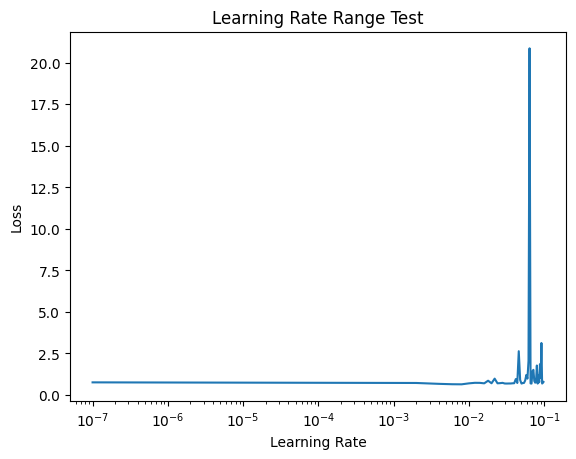

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import LearningRateScheduler
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from keras.optimizers import Adam

def lr_schedule(epoch):
    start_lr = 1e-7
    end_lr = 1e-1
    return start_lr + epoch * (end_lr - start_lr) / epochs

# Create a simple neural network model
model = mlp_adam1()

# Compile the model with an initial learning rate (you can adjust this)
initial_lr = 1e-5
model.compile(optimizer=Adam(learning_rate=initial_lr), loss='binary_crossentropy', metrics=['accuracy'])

# Perform the learning rate range test
epochs = 50  # Number of total epochs

# Define Learning Rate Scheduler callback with custom schedule function
lr_callback = LearningRateScheduler(lr_schedule)

# Train the model
history = model.fit(x_train1, y_train1, epochs=epochs, batch_size=32, validation_split=0.2, callbacks=[lr_callback])

# Visualize the learning rate vs. loss
lrs = [lr_schedule(epoch) for epoch in range(epochs)]
losses = history.history['loss']
plt.semilogx(lrs, losses)
plt.xlabel('Learning Rate')
plt.ylabel('Loss')
plt.title('Learning Rate Range Test')
plt.show()

In [ ]:
tf.random.set_seed(123)
model_adam1 = mlp_adam1()
model_adam1.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.007), metrics=['accuracy'])  # Utilisez Adam
#model_adam1.summary()

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss',
                              min_delta=0,
                              patience=5,
                              verbose=0, mode='auto', restore_best_weights=True)  # Stop training after 5 epochs of no improvement in validation loss
# reduce_lr = ReduceLROnPlateau(monitor='val_accuracy',  # Metric to be monitored
#                               factor=0.5,          # Factor by which the learning rate will be reduced (new_lr = lr * factor)
#                               patience=10,          # Number of epochs with no improvement after which learning rate will be reduced
#                               min_lr=1e-7,         # Lower bound on the learning rate
#                               verbose=1)

model_train_a1 =  model_adam1.fit(x_train1,y_train1, epochs=20,validation_data=(x_test1, y_test1),batch_size=60)#, callbacks=[early_stopping])


Epoch 1/20
44/44 [==============================] - 3s 10ms/step - loss: 1.0230 - accuracy: 0.5688 - val_loss: 0.6216 - val_accuracy: 0.6892
Epoch 2/20
44/44 [==============================] - 0s 6ms/step - loss: 0.6307 - accuracy: 0.6747 - val_loss: 0.6375 - val_accuracy: 0.6590
Epoch 3/20
44/44 [==============================] - 0s 6ms/step - loss: 0.5923 - accuracy: 0.7078 - val_loss: 0.5565 - val_accuracy: 0.7549
Epoch 4/20
44/44 [==============================] - 0s 6ms/step - loss: 0.5566 - accuracy: 0.7291 - val_loss: 0.5184 - val_accuracy: 0.7620
Epoch 5/20
44/44 [==============================] - 0s 6ms/step - loss: 0.5440 - accuracy: 0.7482 - val_loss: 0.5186 - val_accuracy: 0.7682
Epoch 6/20
44/44 [==============================] - 0s 6ms/step - loss: 0.5548 - accuracy: 0.7356 - val_loss: 0.5122 - val_accuracy: 0.7558
Epoch 7/20
44/44 [==============================] - 0s 6ms/step - loss: 0.5494 - accuracy: 0.7497 - val_loss: 0.5453 - val_accuracy: 0.7496
Epoch 8/20
44/44 [=

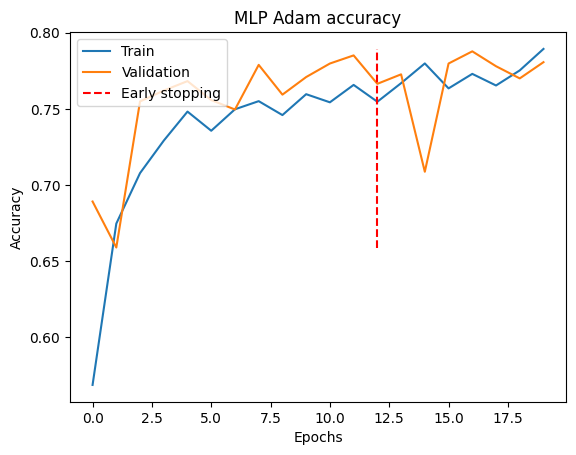

In [ ]:
# Curves Accuracy
plt.plot(model_train_a1.history['accuracy'])
plt.plot(model_train_a1.history['val_accuracy'])
plt.vlines(x=12,ymin=min(model_train_a1.history['val_accuracy']), ymax=max(model_train_a1.history['accuracy']), colors='red', linestyles='dashed', label='Early stopping')
plt.title('MLP Adam accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation', 'Early stopping'], loc='upper left')
plt.savefig('Figures/mlp_adam_acc_78_final.png',  dpi=500)
plt.show()

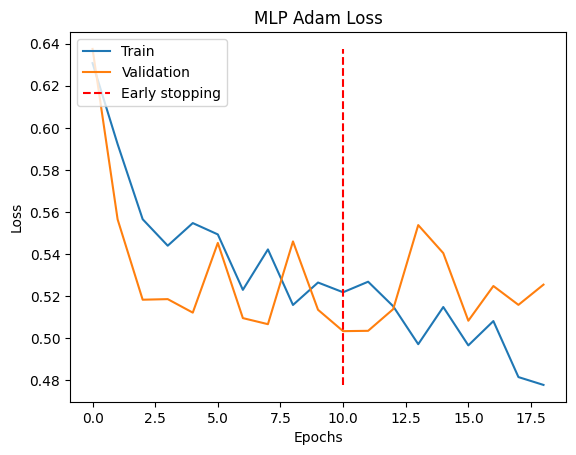

In [ ]:
# Curves loss
plt.plot(model_train_a1.history['loss'][1:])
plt.plot(model_train_a1.history['val_loss'][1:])
plt.vlines(x=10, ymin=min(model_train_a1.history['loss']), ymax=max(model_train_a1.history['val_loss']), colors='red', linestyles='dashed', label='Early stopping')
plt.title('MLP Adam Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation', 'Early stopping'], loc='upper left')
plt.savefig('Figures/mlp_adam_78_loss_final.png',  dpi=500)
plt.show()

In [ ]:
evaluation = model_adam1.evaluate(x_test1,y_test1)

print("Accuracy: %.2f" % (evaluation[1] * 100))
print('Loss: %2f' % (evaluation[0]))

predictions = model_adam1.predict(x_test1)

maxi = [np.argmax(x) for x in predictions]
print("10 first Prediction, Rounded raw predictions and true class")
for i in range(10):
  print(f'{predictions[i]} | {maxi[i]} | True:  {y_test1.iloc[i]} ')

36/36 [==============================] - 0s 2ms/step - loss: 0.5255 - accuracy: 0.7806
Accuracy: 78.06
Loss: 0.525528
36/36 [==============================] - 0s 2ms/step
10 first Prediction, Rounded raw predictions and true class
[0.92522407] | 0 | True:  Activity    1
Name: 2767, dtype: int64 
[0.6450291] | 0 | True:  Activity    0
Name: 2745, dtype: int64 
[0.97186565] | 0 | True:  Activity    1
Name: 660, dtype: int64 
[0.6254086] | 0 | True:  Activity    1
Name: 2165, dtype: int64 
[0.13619368] | 0 | True:  Activity    1
Name: 2340, dtype: int64 
[0.5180481] | 0 | True:  Activity    0
Name: 2914, dtype: int64 
[0.21403566] | 0 | True:  Activity    0
Name: 1818, dtype: int64 
[0.82677686] | 0 | True:  Activity    1
Name: 38, dtype: int64 
[0.5116205] | 0 | True:  Activity    1
Name: 1532, dtype: int64 
[0.9032346] | 0 | True:  Activity    1
Name: 2477, dtype: int64 


36/36 [==============================] - 0s 2ms/step
[[350 159]
 [ 91 526]]
Accuracy:0.78


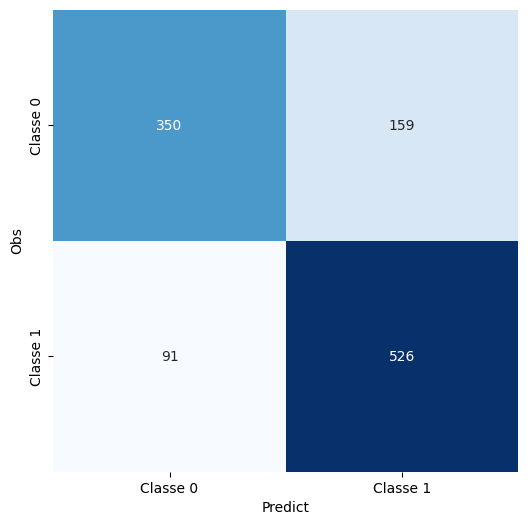

In [ ]:

X_test = pd.read_csv("X_test_30.csv", index_col=0)
y_test = pd.read_csv("y_test_30.csv")
indices_test = y_test["Unnamed: 0"]
y_test = pd.read_csv("y_test_30.csv", index_col=0)
y_pred_test_proba = model_adam1.predict(X_test)
y_test_classes = np.where(y_pred_test_proba >= 0.5,1,0)
epsilon = 1e-5  # Small value to prevent log(0) errors
y_pred_test_proba = np.clip(y_pred_test_proba,epsilon, 1-epsilon)
y_test = y_test.values
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_test_classes)
print(cm)
tot = cm[0][0]+cm[1][1] + cm[0][1]+cm[1][0]
accuracy = (cm[0][0]+cm[1][1]) /tot
print(f"Accuracy:{accuracy:.2f}")
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Classe 0', 'Classe 1'], yticklabels=['Classe 0', 'Classe 1'])
plt.xlabel('Predict')
plt.ylabel('Obs')

plt.show()
predictions = [1 if p>=0.5 else 0 for p in y_pred_test_proba]
# SAVE LES 0/1 PREDITS
y_pred_to_save = pd.DataFrame( predictions, indices_test)
y_pred_to_save.to_csv("YPred_models/y_pred_adam_78_finalhhh.csv")
# SAVE LES PROBAS PREDITS
y_pred_prob_to_save = pd.DataFrame( y_pred_test_proba, indices_test)
y_pred_prob_to_save.to_csv("YPred_models/y_pred_prob_adam_78_finaljhjj.csv")

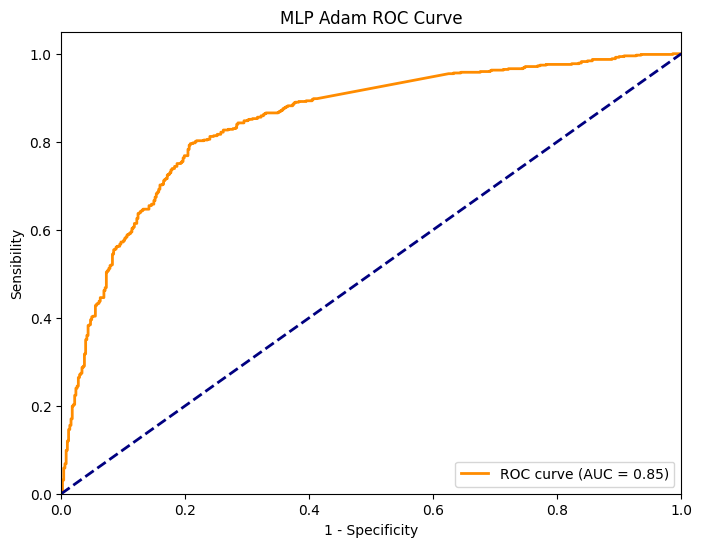

In [ ]:
# ROC curve
from sklearn.metrics import roc_curve, auc

fpr, tpr, _ = roc_curve(y_test, y_pred_test_proba)
roc_auc = auc(fpr, tpr)


plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1 - Specificity')
plt.ylabel('Sensibility')
plt.title('MLP Adam ROC Curve')
plt.legend(loc='lower right')
plt.savefig('Figures/adam_78_ROC_finalhjhhh.png',  dpi=500)
plt.show()

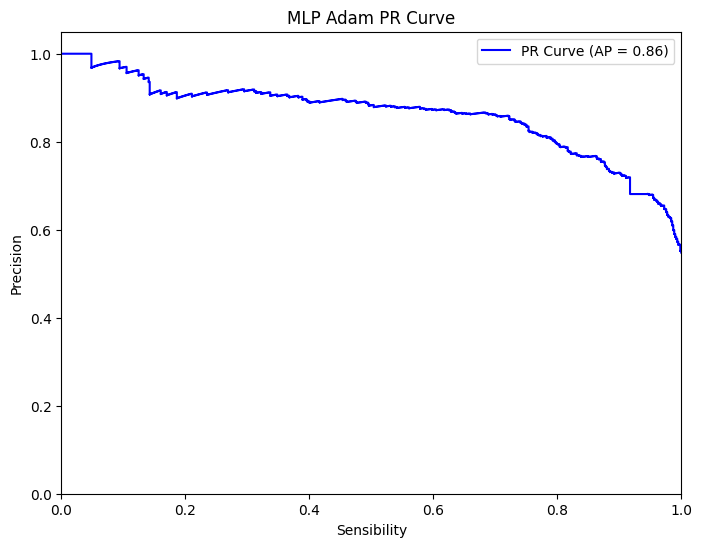

In [ ]:
# PR curve :
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score

precision, recall, _ = precision_recall_curve(y_test, y_pred_test_proba)

average_precision = average_precision_score(y_test, y_pred_test_proba)

# Plot PR curve
plt.figure(figsize=(8, 6))
plt.step(recall, precision, color='b', where='post', label=f'PR Curve (AP = {average_precision:.2f})')
plt.xlabel('Sensibility')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('MLP Adam PR Curve')
plt.legend(loc='upper right')
plt.show()

In [ ]:
# Calculate F1-Score
from sklearn.metrics import f1_score
f1 = f1_score(y_test, y_test_classes)
print("F1-Score:", f1)

F1-Score: 0.8122137404580152


In [ ]:
# MCC
from sklearn.metrics import matthews_corrcoef
mcc = matthews_corrcoef(y_test, y_test_classes)
print("MCC:", mcc)

MCC: 0.5585061810246573


In [ ]:
# Sensibilité :
from sklearn.metrics import recall_score
sensitivity = recall_score(y_test, y_test_classes)

print("Sensibilité", sensitivity)

Sensibilité 0.8622366288492707


In [ ]:
# Calculate Specificity
specificity = cm[0, 0] / (cm[0, 0] + cm[0, 1])

print("Specificity:", specificity)

Specificity: 0.6836935166994106


In [ ]:
# Log loss
import math
def compute_log_loss_for_one_sample(y_obs, y_pred):
  return -(y_obs * math.log(y_pred) + (1-y_obs)*math.log(1-y_pred))

def compute_log_loss(y_obs, y_pred):
  """
  Computing the log loss metric.
  y_obs = the data we have, the "real" data (vector)
  """
  log_loss = -np.mean(y_obs * np.log(y_pred) + (1-y_obs)*np.log(1-y_pred))
  return log_loss

In [ ]:

log_losses = []
# Getting the log loss for each sample in test data set
for i in range(len(y_pred_test_proba)):
  log_losses.append(compute_log_loss_for_one_sample(y_test[i], y_pred_test_proba[i]))

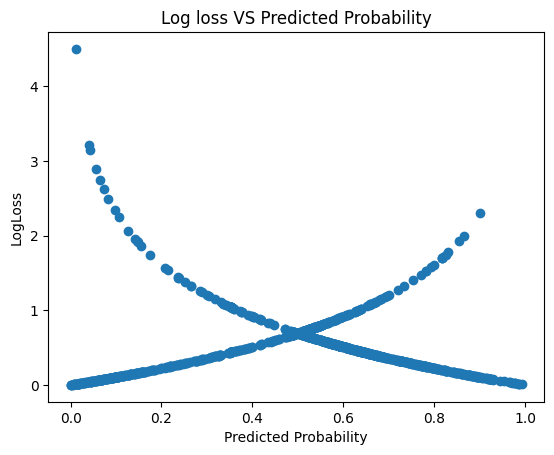

In [ ]:
#Plotting log loss and predicted probability
plt.scatter(y=log_losses, x = y_pred_test_proba)
plt.title('Log loss VS Predicted Probability')
plt.ylabel('LogLoss')
plt.xlabel('Predicted Probability')
plt.show()

In [ ]:
# Performances à soumettre sur le test de kaggle :
from sklearn.preprocessing import MinMaxScaler
X_test_Kaggle = pd.read_csv("test.csv")
print(X_test_Kaggle.shape)
scaler = MinMaxScaler()

# Fit and transform the data using Min-Max scaling
X_scaled = scaler.fit_transform(X_test_Kaggle)
print(X_scaled)
X_scaled = pd.DataFrame(X_scaled, columns = X_test_Kaggle.columns)# without the activity label
X_scaled = X_scaled[x_train1.columns]
y_pred_test_proba = model_adam1.predict(X_scaled)
print(y_pred_test_proba.shape)

# Créez un dictionnaire avec les données
y_pred_test_proba = y_pred_test_proba[:, 0]
data = {
    'MoleculeId': [i for i in range(1,2501+1 )],
    'PredictedProbability': y_pred_test_proba
}

# Créez un DataFrame à partir du dictionnaire
df = pd.DataFrame(data)

# Enregistrez le DataFrame au format CSV (ou tout autre format de votre choix)
df.to_csv('pred_Adam.csv', index=False)

(2501, 1776)
[[0.37931035 0.61176451 0.05       ... 0.         1.         0.        ]
 [0.10344828 0.75817463 0.3        ... 0.         0.         0.        ]
 [0.10344828 0.65881212 0.1        ... 0.         0.         0.        ]
 ...
 [0.         0.53788699 0.15       ... 0.         0.         0.        ]
 [0.03444828 0.53850418 0.1        ... 0.         0.         0.        ]
 [0.17241379 0.64893183 0.05       ... 0.         0.         0.        ]]
79/79 [==============================] - 0s 2ms/step
(2501, 1)


### SGD MLP


In [ ]:
from keras.optimizers import SGD

# SGD
def mlp_SGD1():
  model = Sequential()
  model.add(Dense(1024, input_shape=(x_train1.shape[1],), activation='relu'))
  model.add(Dropout(0.5))
  model.add(Dense(960, activation='relu'))
  model.add(Dropout(0.5))
  model.add(Dense(256, activation='relu'))
  model.add(Dropout(0.5))
  model.add(Dense(128, activation='relu'))
  model.add(Dropout(0.3))
  model.add(Dense(1, activation='sigmoid'))
  return model




Epoch 1/50
66/66 [==============================] - 2s 7ms/step - loss: 0.7274 - accuracy: 0.4829 - val_loss: 0.6991 - val_accuracy: 0.4781 - lr: 1.0000e-07
Epoch 2/50
66/66 [==============================] - 0s 5ms/step - loss: 0.7283 - accuracy: 0.5395 - val_loss: 0.6138 - val_accuracy: 0.6895 - lr: 0.0020
Epoch 3/50
66/66 [==============================] - 0s 5ms/step - loss: 0.6535 - accuracy: 0.6548 - val_loss: 0.6693 - val_accuracy: 0.7371 - lr: 0.0040
Epoch 4/50
66/66 [==============================] - 0s 5ms/step - loss: 0.6355 - accuracy: 0.6748 - val_loss: 0.5425 - val_accuracy: 0.7429 - lr: 0.0060
Epoch 5/50
66/66 [==============================] - 0s 5ms/step - loss: 0.6409 - accuracy: 0.6781 - val_loss: 0.5280 - val_accuracy: 0.7581 - lr: 0.0080
Epoch 6/50
66/66 [==============================] - 0s 5ms/step - loss: 0.7155 - accuracy: 0.6024 - val_loss: 0.6363 - val_accuracy: 0.6610 - lr: 0.0100
Epoch 7/50
66/66 [==============================] - 0s 5ms/step - loss: 0.7688

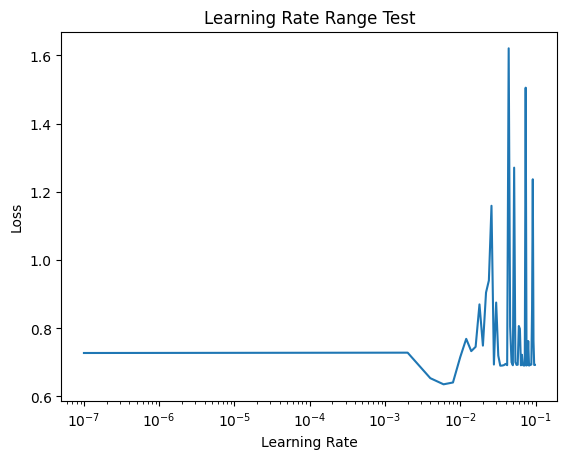

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import LearningRateScheduler
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from keras.optimizers import Adam

def lr_schedule(epoch):
    start_lr = 1e-7
    end_lr = 1e-1
    return start_lr + epoch * (end_lr - start_lr) / epochs

# Create a simple neural network model
model = mlp_adam1()

# Compile the model with an initial learning rate (you can adjust this)
initial_lr = 1e-5
model.compile(optimizer=Adam(learning_rate=initial_lr), loss='binary_crossentropy', metrics=['accuracy'])

# Perform the learning rate range test
epochs = 50  # Number of total epochs

# Define Learning Rate Scheduler callback with custom schedule function
lr_callback = LearningRateScheduler(lr_schedule)

# Train the model
history = model.fit(x_train1, y_train1, epochs=epochs, batch_size=32, validation_split=0.2, callbacks=[lr_callback])

# Visualize the learning rate vs. loss
lrs = [lr_schedule(epoch) for epoch in range(epochs)]
losses = history.history['loss']
plt.semilogx(lrs, losses)
plt.xlabel('Learning Rate')
plt.ylabel('Loss')
plt.title('Learning Rate Range Test')
plt.show()

In [ ]:
tf.random.set_seed(123)
sgd = SGD(learning_rate=0.007, momentum=0.9)

# modele SGD
model_sgd1 = mlp_SGD1()
model_sgd1.compile(loss='binary_crossentropy', optimizer=sgd, metrics=['accuracy'])
#model_sgd1.summary()

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss',
                              min_delta=0,
                              patience=1,
                              verbose=0, mode='auto', restore_best_weights=True)  # Stop training after 5 epochs of no improvement in validation loss
# reduce_lr = ReduceLROnPlateau(monitor='val_accuracy',  # Metric to be monitored
#                               factor=0.5,          # Factor by which the learning rate will be reduced (new_lr = lr * factor)
#                               patience=10,          # Number of epochs with no improvement after which learning rate will be reduced
#                               min_lr=1e-7,         # Lower bound on the learning rate
#                               verbose=1)

model_train_s1 =  model_sgd1.fit(x_train1,y_train1, epochs=20,validation_data=(x_test1, y_test1),batch_size=60)#, callbacks=[early_stopping])


Epoch 1/20
44/44 [==============================] - 2s 10ms/step - loss: 0.7043 - accuracy: 0.5211 - val_loss: 0.6772 - val_accuracy: 0.5844
Epoch 2/20
44/44 [==============================] - 0s 5ms/step - loss: 0.6794 - accuracy: 0.5516 - val_loss: 0.6625 - val_accuracy: 0.6146
Epoch 3/20
44/44 [==============================] - 0s 5ms/step - loss: 0.6680 - accuracy: 0.5989 - val_loss: 0.6356 - val_accuracy: 0.6288
Epoch 4/20
44/44 [==============================] - 0s 5ms/step - loss: 0.6416 - accuracy: 0.6389 - val_loss: 0.6020 - val_accuracy: 0.6821
Epoch 5/20
44/44 [==============================] - 0s 6ms/step - loss: 0.6262 - accuracy: 0.6518 - val_loss: 0.5723 - val_accuracy: 0.7309
Epoch 6/20
44/44 [==============================] - 0s 5ms/step - loss: 0.5932 - accuracy: 0.6880 - val_loss: 0.5387 - val_accuracy: 0.7442
Epoch 7/20
44/44 [==============================] - 0s 5ms/step - loss: 0.5769 - accuracy: 0.7097 - val_loss: 0.5219 - val_accuracy: 0.7531
Epoch 8/20
44/44 [=

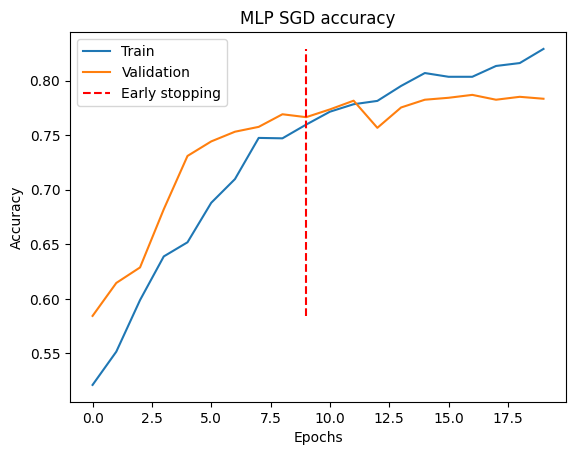

In [ ]:
# Curves Accuracy
plt.plot(model_train_s1.history['accuracy'])
plt.plot(model_train_s1.history['val_accuracy'])
plt.vlines(x=9,ymin=min(model_train_s1.history['val_accuracy']), ymax=max(model_train_s1.history['accuracy']), colors='red', linestyles='dashed', label='Early stopping')
plt.title('MLP SGD accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation', 'Early stopping'], loc='upper left')
plt.savefig('Figures/mlp_sgd_acc_79_final.png',  dpi=500)
plt.show()

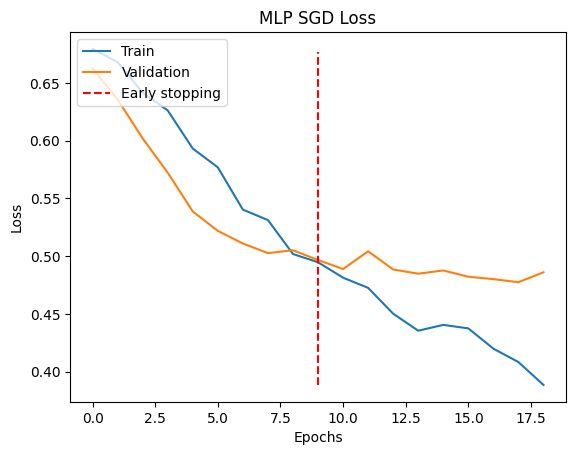

In [ ]:
# Curves loss
plt.plot(model_train_s1.history['loss'][1:])
plt.plot(model_train_s1.history['val_loss'][1:])
plt.vlines(x=9, ymin=min(model_train_s1.history['loss']), ymax=max(model_train_s1.history['val_loss']), colors='red', linestyles='dashed', label='Early stopping')
plt.title('MLP SGD Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation', 'Early stopping'], loc='upper left')
plt.savefig('Figures/mlp_SGD_79_loss_final.png',  dpi=500)
plt.show()

In [ ]:
evaluation = model_sgd1.evaluate(x_test1,y_test1)

print("Accuracy: %.2f" % (evaluation[1] * 100))
print('Loss: %2f' % (evaluation[0]))

predictions = model_sgd1.predict(x_test1)

maxi = [np.argmax(x) for x in predictions]
print("10 first Prediction, Rounded raw predictions and true class")
for i in range(10):
  print(f'{predictions[i]} | {maxi[i]} | True:  {y_test1.iloc[i]} ')

36/36 [==============================] - 0s 2ms/step - loss: 0.4861 - accuracy: 0.7833
Accuracy: 78.33
Loss: 0.486062
36/36 [==============================] - 0s 2ms/step
10 first Prediction, Rounded raw predictions and true class
[0.87217075] | 0 | True:  Activity    1
Name: 2767, dtype: int64 
[0.7969705] | 0 | True:  Activity    0
Name: 2745, dtype: int64 
[0.9595157] | 0 | True:  Activity    1
Name: 660, dtype: int64 
[0.3760549] | 0 | True:  Activity    1
Name: 2165, dtype: int64 
[0.23662233] | 0 | True:  Activity    1
Name: 2340, dtype: int64 
[0.53041553] | 0 | True:  Activity    0
Name: 2914, dtype: int64 
[0.12896068] | 0 | True:  Activity    0
Name: 1818, dtype: int64 
[0.86438113] | 0 | True:  Activity    1
Name: 38, dtype: int64 
[0.50206107] | 0 | True:  Activity    1
Name: 1532, dtype: int64 
[0.9219697] | 0 | True:  Activity    1
Name: 2477, dtype: int64 


36/36 [==============================] - 0s 2ms/step
[[375 134]
 [100 517]]
Accuracy:0.79


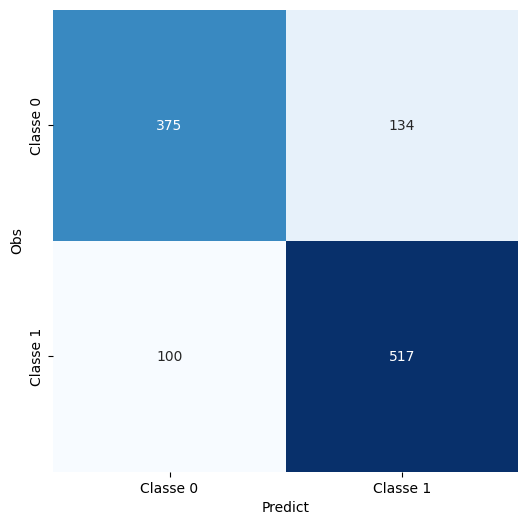

In [ ]:

X_test = pd.read_csv("X_test_30.csv", index_col=0)
y_test = pd.read_csv("y_test_30.csv")
indices_test = y_test["Unnamed: 0"]
y_test = pd.read_csv("y_test_30.csv", index_col=0)
y_pred_test_proba = model_sgd1.predict(X_test)
y_test_classes = np.where(y_pred_test_proba >= 0.5,1,0)
epsilon = 1e-5  # Small value to prevent log(0) errors
y_pred_test_proba = np.clip(y_pred_test_proba,epsilon, 1-epsilon)
y_test = y_test.values
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_test_classes)
print(cm)
tot = cm[0][0]+cm[1][1] + cm[0][1]+cm[1][0]
accuracy = (cm[0][0]+cm[1][1]) /tot
print(f"Accuracy:{accuracy:.2f}")
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Classe 0', 'Classe 1'], yticklabels=['Classe 0', 'Classe 1'])
plt.xlabel('Predict')
plt.ylabel('Obs')

plt.show()
predictions = [1 if p>=0.5 else 0 for p in y_pred_test_proba]
# SAVE LES 0/1 PREDITS
y_pred_to_save = pd.DataFrame( predictions, indices_test)
y_pred_to_save.to_csv("YPred_models/y_pred_sgd_79_final.csv")
# SAVE LES PROBAS PREDITS
y_pred_prob_to_save = pd.DataFrame( y_pred_test_proba, indices_test)
y_pred_prob_to_save.to_csv("YPred_models/y_pred_prob_sgd_79_final.csv")

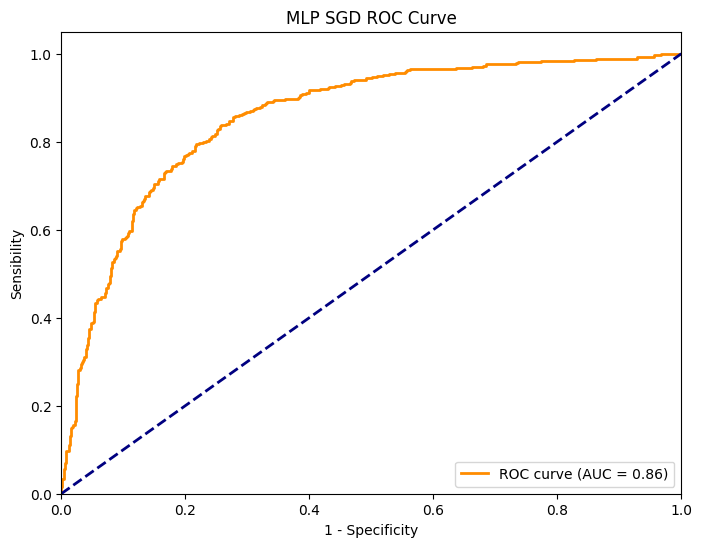

In [ ]:
# ROC curve
from sklearn.metrics import roc_curve, auc

fpr, tpr, _ = roc_curve(y_test, y_pred_test_proba)
roc_auc = auc(fpr, tpr)


plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1 - Specificity')
plt.ylabel('Sensibility')
plt.title('MLP SGD ROC Curve')
plt.legend(loc='lower right')
plt.savefig('Figures/sgd_79_ROC_final.png',  dpi=500)
plt.show()

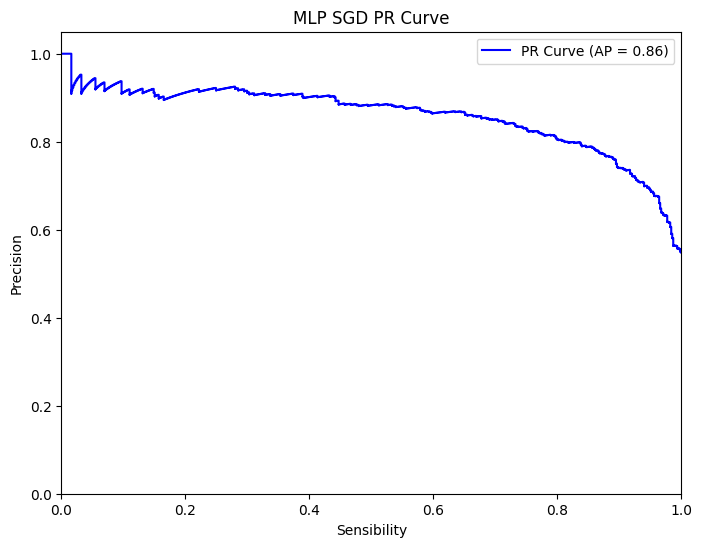

In [ ]:
# PR curve :
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score

precision, recall, _ = precision_recall_curve(y_test, y_pred_test_proba)

average_precision = average_precision_score(y_test, y_pred_test_proba)

# Plot PR curve
plt.figure(figsize=(8, 6))
plt.step(recall, precision, color='b', where='post', label=f'PR Curve (AP = {average_precision:.2f})')
plt.xlabel('Sensibility')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('MLP SGD PR Curve')
plt.legend(loc='upper right')
plt.show()

In [ ]:
# Calculate F1-Score
from sklearn.metrics import f1_score
f1 = f1_score(y_test, y_test_classes)
print("F1-Score:", f1)

F1-Score: 0.8154574132492114


In [ ]:
# MCC
from sklearn.metrics import matthews_corrcoef
mcc = matthews_corrcoef(y_test, y_test_classes)
print("MCC:", mcc)

MCC: 0.5791329542803982


In [ ]:
# Sensibilité :
from sklearn.metrics import recall_score
sensitivity = recall_score(y_test, y_test_classes)

print("Sensibilité", sensitivity)

Sensibilité 0.8379254457050244


In [ ]:
# Calculate Specificity
specificity = cm[0, 0] / (cm[0, 0] + cm[0, 1])

print("Specificity:", specificity)

Specificity: 0.7367387033398821


In [ ]:
# Log loss
import math
def compute_log_loss_for_one_sample(y_obs, y_pred):
  return -(y_obs * math.log(y_pred) + (1-y_obs)*math.log(1-y_pred))

def compute_log_loss(y_obs, y_pred):
  """
  Computing the log loss metric.
  y_obs = the data we have, the "real" data (vector)
  """
  log_loss = -np.mean(y_obs * np.log(y_pred) + (1-y_obs)*np.log(1-y_pred))
  return log_loss

In [ ]:

log_losses = []
# Getting the log loss for each sample in test data set
for i in range(len(y_pred_test_proba)):
  log_losses.append(compute_log_loss_for_one_sample(y_test[i], y_pred_test_proba[i]))

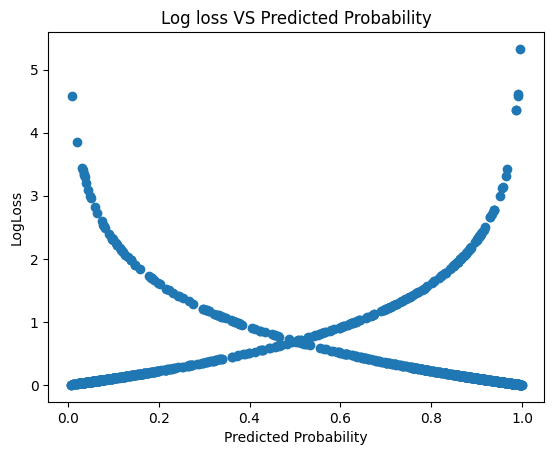

In [ ]:
#Plotting log loss and predicted probability
plt.scatter(y=log_losses, x = y_pred_test_proba)
plt.title('Log loss VS Predicted Probability')
plt.ylabel('LogLoss')
plt.xlabel('Predicted Probability')
plt.show()

In [ ]:
# Performances à soumettre sur le test de kaggle :
from sklearn.preprocessing import MinMaxScaler
X_test_Kaggle = pd.read_csv("test.csv")
print(X_test_Kaggle.shape)
scaler = MinMaxScaler()

# Fit and transform the data using Min-Max scaling
X_scaled = scaler.fit_transform(X_test_Kaggle)
print(X_scaled)
X_scaled = pd.DataFrame(X_scaled, columns = X_test_Kaggle.columns)# without the activity label
X_scaled = X_scaled[x_train1.columns]
y_pred_test_proba = model_sgd1.predict(X_scaled)
print(y_pred_test_proba.shape)

# Créez un dictionnaire avec les données
y_pred_test_proba = y_pred_test_proba[:, 0]
data = {
    'MoleculeId': [i for i in range(1,2501+1 )],
    'PredictedProbability': y_pred_test_proba
}

# Créez un DataFrame à partir du dictionnaire
df = pd.DataFrame(data)

# Enregistrez le DataFrame au format CSV (ou tout autre format de votre choix)
df.to_csv('pred_SGD.csv', index=False)

(2501, 1776)
[[0.37931035 0.61176451 0.05       ... 0.         1.         0.        ]
 [0.10344828 0.75817463 0.3        ... 0.         0.         0.        ]
 [0.10344828 0.65881212 0.1        ... 0.         0.         0.        ]
 ...
 [0.         0.53788699 0.15       ... 0.         0.         0.        ]
 [0.03444828 0.53850418 0.1        ... 0.         0.         0.        ]
 [0.17241379 0.64893183 0.05       ... 0.         0.         0.        ]]
79/79 [==============================] - 0s 2ms/step
(2501, 1)


## RNN

In [ ]:

# Création du modèle RNN
def RNN_model():
    hidden_units = 256
    input_shape  = (x_train1.shape[1], 1)
    model = Sequential()
    model.add(SimpleRNN(hidden_units, input_shape=input_shape, activation="relu",return_sequences=True))
    model.add(Flatten())
    model.add(Dense(units=1, activation='sigmoid'))
    # Compile model
    model.compile(loss='binary_crossentropy', metrics=['accuracy'], optimizer=Adam(learning_rate=0.0001))
    return model

In [ ]:
tf.random.set_seed(123)
# Affichage de la structure du modèle
model_RNN = RNN_model()

#print(model_RNN.summary()

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss',
                              min_delta=0,
                              patience=4,
                              verbose=0, mode='auto', restore_best_weights=True)  # Stop training after 5 epochs of no improvement in validation loss
# reduce_lr = ReduceLROnPlateau(monitor='val_accuracy',  # Metric to be monitored
#                               factor=0.5,          # Factor by which the learning rate will be reduced (new_lr = lr * factor)
#                               patience=10,          # Number of epochs with no improvement after which learning rate will be reduced
#                               min_lr=1e-7,         # Lower bound on the learning rate
#                               verbose=1)

model_train_r1 =  model_RNN.fit(x_train1,y_train1, epochs=20,validation_data=(x_test1, y_test1),batch_size=30)#, callbacks=[early_stopping])


Epoch 1/20
88/88 [==============================] - 70s 779ms/step - loss: 0.6287 - accuracy: 0.6575 - val_loss: 0.5569 - val_accuracy: 0.7318
Epoch 2/20
88/88 [==============================] - 67s 761ms/step - loss: 0.5180 - accuracy: 0.7573 - val_loss: 0.5184 - val_accuracy: 0.7540
Epoch 3/20
88/88 [==============================] - 67s 764ms/step - loss: 0.4594 - accuracy: 0.7909 - val_loss: 0.4783 - val_accuracy: 0.7806
Epoch 4/20
88/88 [==============================] - 66s 754ms/step - loss: 0.4229 - accuracy: 0.8034 - val_loss: 0.4824 - val_accuracy: 0.7735
Epoch 5/20
88/88 [==============================] - 66s 747ms/step - loss: 0.4059 - accuracy: 0.8156 - val_loss: 0.4827 - val_accuracy: 0.7833
Epoch 6/20
88/88 [==============================] - 65s 741ms/step - loss: 0.3740 - accuracy: 0.8373 - val_loss: 0.4883 - val_accuracy: 0.7798
Epoch 7/20
88/88 [==============================] - 66s 747ms/step - loss: 0.3628 - accuracy: 0.8446 - val_loss: 0.4863 - val_accuracy: 0.7851

In [ ]:
model = RNN_model()
print(f'{model.summary()}')
#plot_model(model, to_file="model.png",
           #    show_shapes=True, show_layer_names=True)

Model: "sequential_47"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_28 (SimpleRNN)   (None, 1533, 128)         16640     
                                                                 
 flatten_28 (Flatten)        (None, 196224)            0         
                                                                 
 dense_123 (Dense)           (None, 1)                 196225    
                                                                 
Total params: 212865 (831.50 KB)
Trainable params: 212865 (831.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


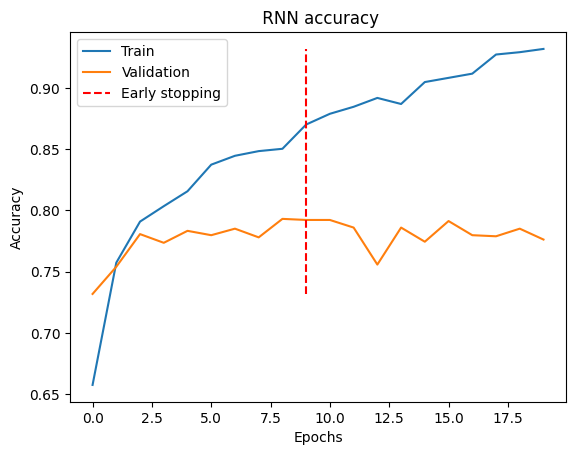

In [ ]:
# Curves Accuracy
plt.plot(model_train_r1.history['accuracy'])
plt.plot(model_train_r1.history['val_accuracy'])
plt.vlines(x=9,ymin=min(model_train_r1.history['val_accuracy']), ymax=max(model_train_r1.history['accuracy']), colors='red', linestyles='dashed', label='Early stopping')
plt.title(' RNN accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation', 'Early stopping'], loc='upper left')
plt.savefig('Figures/RNN_acc_76_final.png',  dpi=500)
plt.show()

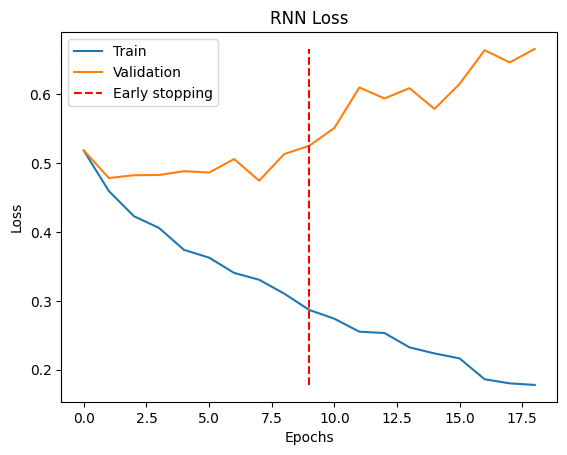

In [ ]:
# Curves loss
plt.plot(model_train_r1.history['loss'][1:])
plt.plot(model_train_r1.history['val_loss'][1:])
plt.vlines(x=9, ymin=min(model_train_r1.history['loss']), ymax=max(model_train_r1.history['val_loss']), colors='red', linestyles='dashed', label='Early stopping')
plt.title('RNN Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation', 'Early stopping'], loc='upper left')
plt.savefig('Figures/mlp_RNN_76_loss_final.png',  dpi=500)
plt.show()

In [ ]:
evaluation = model_RNN.evaluate(x_test1,y_test1)

print("Accuracy: %.2f" % (evaluation[1] * 100))
print('Loss: %2f' % (evaluation[0]))

predictions = model_RNN.predict(x_test1)

maxi = [np.argmax(x) for x in predictions]
print("10 first Prediction, Rounded raw predictions and true class")
for i in range(10):
  print(f'{predictions[i]} | {maxi[i]} | True:  {y_test1.iloc[i]} ')

36/36 [==============================] - 4s 105ms/step - loss: 0.6658 - accuracy: 0.7762
Accuracy: 77.62
Loss: 0.665806
36/36 [==============================] - 4s 107ms/step
10 first Prediction, Rounded raw predictions and true class
[0.9049494] | 0 | True:  Activity    1
Name: 2767, dtype: int64 
[0.8689177] | 0 | True:  Activity    0
Name: 2745, dtype: int64 
[0.99973994] | 0 | True:  Activity    1
Name: 660, dtype: int64 
[0.4728766] | 0 | True:  Activity    1
Name: 2165, dtype: int64 
[0.04160399] | 0 | True:  Activity    1
Name: 2340, dtype: int64 
[0.663456] | 0 | True:  Activity    0
Name: 2914, dtype: int64 
[0.06519991] | 0 | True:  Activity    0
Name: 1818, dtype: int64 
[0.7766112] | 0 | True:  Activity    1
Name: 38, dtype: int64 
[0.20548235] | 0 | True:  Activity    1
Name: 1532, dtype: int64 
[0.9932527] | 0 | True:  Activity    1
Name: 2477, dtype: int64 


36/36 [==============================] - 4s 106ms/step
[[378 131]
 [116 501]]
Accuracy:0.78


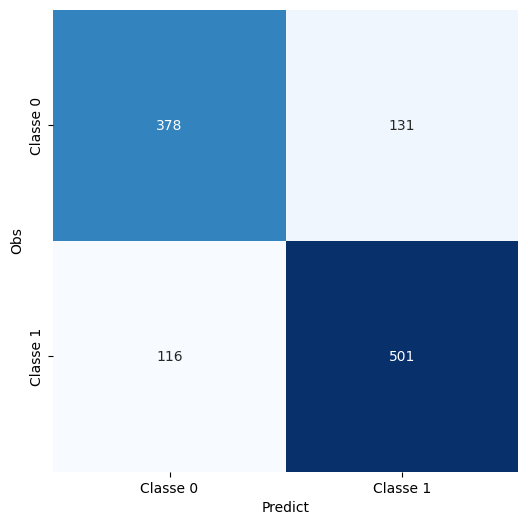

In [ ]:

X_test = pd.read_csv("X_test_30.csv", index_col=0)
y_test = pd.read_csv("y_test_30.csv")
indices_test = y_test["Unnamed: 0"]
y_test = pd.read_csv("y_test_30.csv", index_col=0)
y_pred_test_proba = model_RNN.predict(X_test)
y_test_classes = np.where(y_pred_test_proba >= 0.5,1,0)
epsilon = 1e-5  # Small value to prevent log(0) errors
y_pred_test_proba = np.clip(y_pred_test_proba,epsilon, 1-epsilon)
y_test = y_test.values
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_test_classes)
print(cm)
tot = cm[0][0]+cm[1][1] + cm[0][1]+cm[1][0]
accuracy = (cm[0][0]+cm[1][1]) /tot
print(f"Accuracy:{accuracy:.2f}")
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Classe 0', 'Classe 1'], yticklabels=['Classe 0', 'Classe 1'])
plt.xlabel('Predict')
plt.ylabel('Obs')

plt.show()
predictions = [1 if p>=0.5 else 0 for p in y_pred_test_proba]
# SAVE LES 0/1 PREDITS
y_pred_to_save = pd.DataFrame( predictions, indices_test)
y_pred_to_save.to_csv("YPred_models/y_pred_RNN_76_final.csv")
# SAVE LES PROBAS PREDITS
y_pred_prob_to_save = pd.DataFrame( y_pred_test_proba, indices_test)
y_pred_prob_to_save.to_csv("YPred_models/y_pred_prob_RNN_76_final.csv")

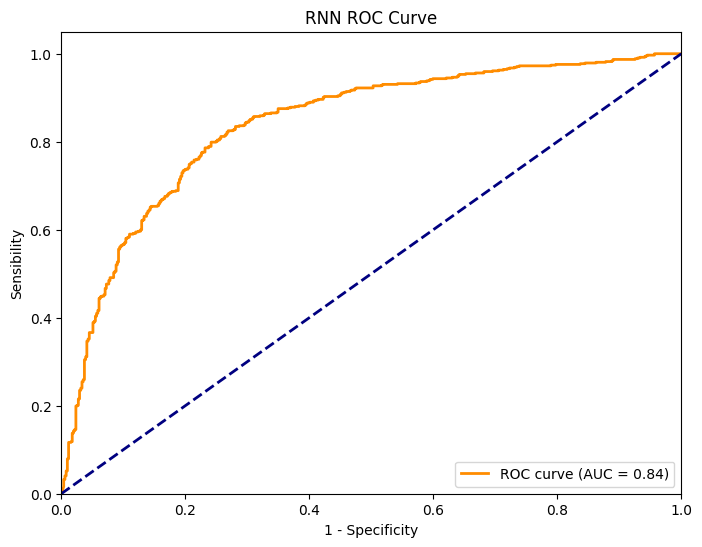

In [ ]:
# ROC curve
from sklearn.metrics import roc_curve, auc

fpr, tpr, _ = roc_curve(y_test, y_pred_test_proba)
roc_auc = auc(fpr, tpr)


plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1 - Specificity')
plt.ylabel('Sensibility')
plt.title('RNN ROC Curve')
plt.legend(loc='lower right')
plt.savefig('Figures/RNN_76_ROC_final.png',  dpi=500)
plt.show()

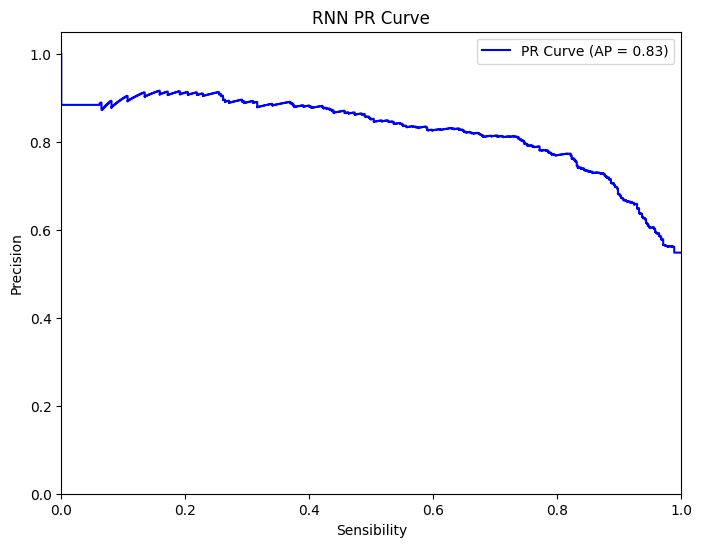

In [ ]:
# PR curve :
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score

precision, recall, _ = precision_recall_curve(y_test, y_pred_test_proba)

average_precision = average_precision_score(y_test, y_pred_test_proba)

# Plot PR curve
plt.figure(figsize=(8, 6))
plt.step(recall, precision, color='b', where='post', label=f'PR Curve (AP = {average_precision:.2f})')
plt.xlabel('Sensibility')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('RNN PR Curve')
plt.legend(loc='upper right')
plt.show()

In [ ]:
# Calculate F1-Score
from sklearn.metrics import f1_score
f1 = f1_score(y_test, y_test_classes)
print("F1-Score:", f1)

F1-Score: 0.8022417934347477


In [ ]:
# MCC
from sklearn.metrics import matthews_corrcoef
mcc = matthews_corrcoef(y_test, y_test_classes)
print("MCC:", mcc)

MCC: 0.5562625036179772


In [ ]:
# Sensibilité :
from sklearn.metrics import recall_score
sensitivity = recall_score(y_test, y_test_classes)

print("Sensibilité", sensitivity)

Sensibilité 0.8119935170178282


In [ ]:
# Calculate Specificity
specificity = cm[0, 0] / (cm[0, 0] + cm[0, 1])

print("Specificity:", specificity)

Specificity: 0.7426326129666012


In [ ]:
# Log loss
import math
def compute_log_loss_for_one_sample(y_obs, y_pred):
  return -(y_obs * math.log(y_pred) + (1-y_obs)*math.log(1-y_pred))

def compute_log_loss(y_obs, y_pred):
  """
  Computing the log loss metric.
  y_obs = the data we have, the "real" data (vector)
  """
  log_loss = -np.mean(y_obs * np.log(y_pred) + (1-y_obs)*np.log(1-y_pred))
  return log_loss

In [ ]:

log_losses = []
# Getting the log loss for each sample in test data set
for i in range(len(y_pred_test_proba)):
  log_losses.append(compute_log_loss_for_one_sample(y_test[i], y_pred_test_proba[i]))

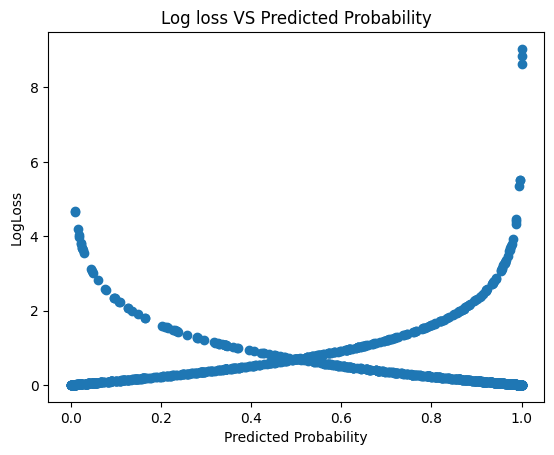

In [ ]:
#Plotting log loss and predicted probability
plt.scatter(y=log_losses, x = y_pred_test_proba)
plt.title('Log loss VS Predicted Probability')
plt.ylabel('LogLoss')
plt.xlabel('Predicted Probability')
plt.show()

In [ ]:
# Performances à soumettre sur le test de kaggle :
from sklearn.preprocessing import MinMaxScaler
X_test_Kaggle = pd.read_csv("test.csv")
print(X_test_Kaggle.shape)
scaler = MinMaxScaler()

# Fit and transform the data using Min-Max scaling
X_scaled = scaler.fit_transform(X_test_Kaggle)
print(X_scaled)
X_scaled = pd.DataFrame(X_scaled, columns = X_test_Kaggle.columns)# without the activity label
X_scaled = X_scaled[x_train1.columns]
y_pred_test_proba = model_RNN.predict(X_scaled)
print(y_pred_test_proba.shape)

# Créez un dictionnaire avec les données
y_pred_test_proba = y_pred_test_proba[:, 0]
data = {
    'MoleculeId': [i for i in range(1,2501+1 )],
    'PredictedProbability': y_pred_test_proba
}

# Créez un DataFrame à partir du dictionnaire
df = pd.DataFrame(data)

# Enregistrez le DataFrame au format CSV (ou tout autre format de votre choix)
df.to_csv('pred_RNN.csv', index=False)

(2501, 1776)
[[0.37931035 0.61176451 0.05       ... 0.         1.         0.        ]
 [0.10344828 0.75817463 0.3        ... 0.         0.         0.        ]
 [0.10344828 0.65881212 0.1        ... 0.         0.         0.        ]
 ...
 [0.         0.53788699 0.15       ... 0.         0.         0.        ]
 [0.03444828 0.53850418 0.1        ... 0.         0.         0.        ]
 [0.17241379 0.64893183 0.05       ... 0.         0.         0.        ]]
79/79 [==============================] - 9s 108ms/step
(2501, 1)


 Plot des differentes metrics and evolution of train/validation loss

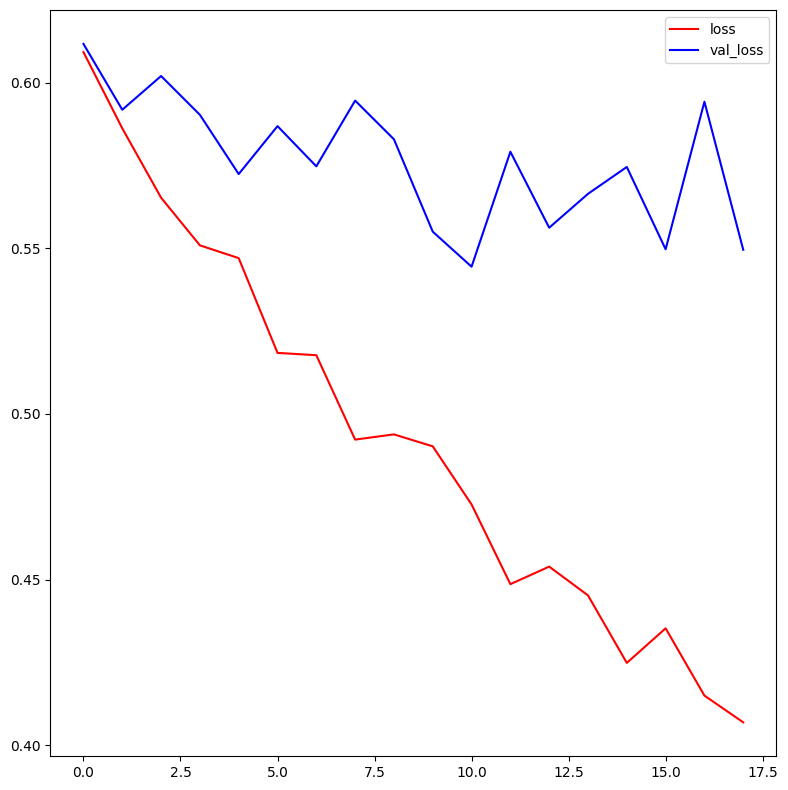

In [ ]:
plt.figure(figsize=(8, 8))
plt.plot(history.history['loss'][2:], color='red', label='loss');
plt.plot(history.history['val_loss'][2:], color='blue', label='val_loss');
plt.legend();
plt.tight_layout();

In [ ]:
history1R = model_RNN.fit(x_train1,y_train1, validation_data = (x_test1,y_test1), epochs=20, batch_size=25)


In [ ]:
plt.figure(figsize=(8, 8))
plt.plot(history1R.history['loss'][2:], color='red', label='loss');
plt.plot(history1R.history['val_loss'][2:], color='blue', label='val_loss');
plt.legend();
plt.tight_layout();

## Multi-input neural network


In [ ]:
#Read data
X_train = pd.read_csv("X_train_30.csv", index_col = 0)
print(X_train.shape)
y_train = pd.read_csv("y_train_30.csv", index_col = 0)
print(y_train.shape)
X_test = pd.read_csv("X_test_30.csv", index_col = 0)
y_test = pd.read_csv("y_test_30.csv", index_col = 0)
total = pd.read_csv("df_cleaned_39.csv", index_col = 0)


(2625, 1533)
(2625, 1)


In [ ]:
#ID les variables catégoriques et continues
feature_cols = X_train.columns.tolist()

cnt_features = []
cat_features = []

for col in feature_cols:
    if X_train[col].dtype=='float64':
        cnt_features.append(col)
    else:
        cat_features.append(col)


X_train[cnt_features] = X_train[cnt_features].astype('float32')
X_train[cat_features] = X_train[cat_features].astype('uint8')
X_test[cnt_features] = X_test[cnt_features].astype('float32')
X_test[cat_features] = X_test[cat_features].astype('uint8')




In [ ]:
bins = 128
n = 0
bins_list = []

bins_list.append(-np.inf)
for i in range(1,bins):
    n += 1./bins
    bins_list.append(n)
bins_list.append(np.inf)

labels = [i for i in range(bins)]
for col in cnt_features:
    X_train[col] = pd.cut(X_train[col], bins=bins_list, labels=labels)
    X_test[col] = pd.cut(X_test[col], bins=bins_list, labels=labels)

X_train.head()

D1  D2  D3 D4  D5  D6  D7  D8  D9 D10  ... D1767 D1768 D1769 D1770  \
446    0  71   0  0  30  77  50  77  92  44  ...     0     0     0     0   
898    4  68   6  0  41  74  51   8  85  45  ...     0     0     0     0   
1516  21  99  19  0  31  67  54  45  76  55  ...     0     0     0     0   
1611  12  78  19  0  28  94  24  64  98  21  ...     0     0     0     0   
2751   4  57   0  0  16  79  48  73  94  42  ...     0     0     0     0   

     D1771 D1772 D1773 D1774 D1775 D1776  
446      0     0     0     0     0     0  
898      0     0     0     0     0     0  
1516     0     0     0     0     0     0  
1611     0     0     0     0     0     0  
2751     0     0     0     0     0     0  

[5 rows x 1533 columns]

In [ ]:
X_train[cnt_features] = X_train[cnt_features].astype('uint8')
X_test[cnt_features] = X_test[cnt_features].astype('uint8')

In [ ]:
X_train[cat_features]

D23  D27  D28  D51  D94  D170  D568  D952  D953  D954  ...  D1767  \
446     1    1    1    1    1     0     0     0     0     0  ...      0   
898     1    0    1    0    0     0     0     0     0     1  ...      0   
1516    1    0    1    0    0     0     0     0     0     0  ...      0   
1611    1    1    1    1    0     0     0     1     1     0  ...      0   
2751    1    1    1    0    0     0     0     1     0     0  ...      0   
...   ...  ...  ...  ...  ...   ...   ...   ...   ...   ...  ...    ...   
3000    1    0    1    0    0     0     0     1     0     0  ...      0   
1667    1    1    1    0    1     0     0     0     1     1  ...      0   
3321    1    1    1    0    1     0     0     1     0     0  ...      0   
1688    1    0    1    0    0     0     0     0     0     0  ...      0   
1898    1    0    1    0    0     0     0     1     1     1  ...      0   

      D1768  D1769  D1770  D1771  D1772  D1773  D1774  D1775  D1776  
446       0      0      0      0      0      0      0      0      0  
898       0      0      0      0      0      0      0      0      0  
1516      0      0      0      0      0      0      0      0      0  
1611      0      0      0      0      0      0      0      0      0  
2751      0      0      0      0      0      0      0      0      0  
...     ...    ...    ...    ...    ...    ...    ...    ...    ...  
3000      0      0      0      0      0      0      0      0      0  
1667      0      0      0      0      0      0      0      0      0  
3321      0      0      0      0      0      0      0      0      0  
1688      0      0      0      0      0      0      0      0      0  
1898      0      0      0      0      0      0      0      0      0  

[2625 rows x 832 columns]

In [ ]:
print(y_train["Activity"].value_counts())

1    1417
0    1208
Name: Activity, dtype: int64


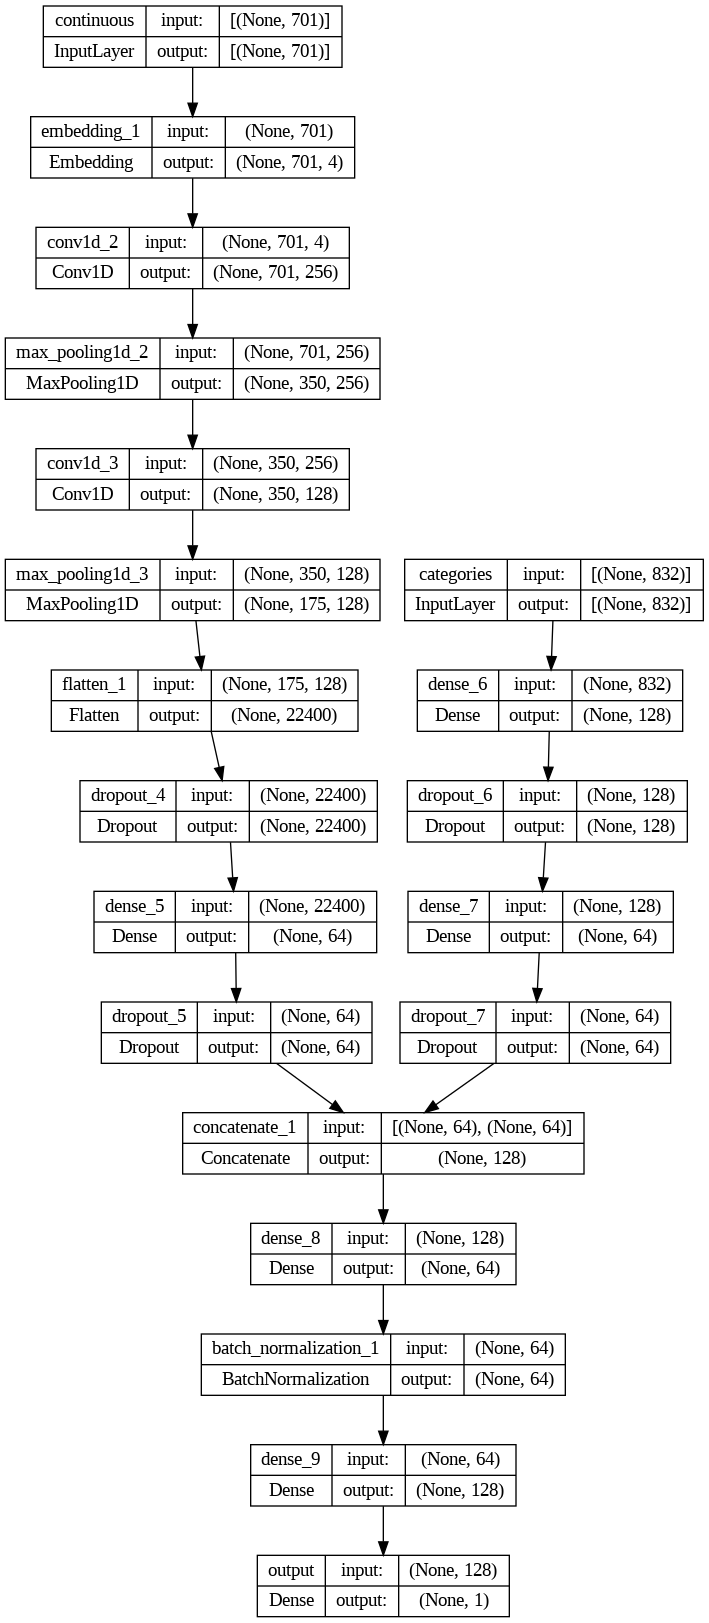

In [ ]:
tf.keras.utils.set_random_seed(123)

x1 = X_train[cnt_features].values
x2 = X_train[cat_features].values
y = y_train

def get_model():
    AF = "relu"
    input_1 = keras.layers.Input(shape=(x1.shape[-1]), name="continuous")
    x_1 = keras.layers.Embedding(input_dim=bins, output_dim=4)(input_1)
    x_1 = keras.layers.Conv1D (filters=256, kernel_size=20,padding = 'same', activation = AF)(x_1)
    x_1 = keras.layers.MaxPooling1D()(x_1)
    x_1 = keras.layers.Conv1D (filters=128, kernel_size=10,padding = 'same', activation = AF)(x_1)
    x_1 = keras.layers.MaxPooling1D()(x_1)
    x_1 = keras.layers.Flatten()(x_1)
    #x_1 = keras.layers.Dense(128, activation=AF)(x_1)
    x_1 = keras.layers.Dropout(0.3)(x_1)
    x_1 = keras.layers.Dense(64, activation=AF)(x_1)
    x_1 = keras.layers.Dropout(0.5)(x_1)

    input_2 = keras.layers.Input(shape=x2.shape[-1], name="categories")
    x_2 = keras.layers.Dense(128, activation=AF)(input_2)
    x_2 = keras.layers.Dropout(0.4)(x_2)
    x_2 = keras.layers.Dense(64, activation=AF)(x_2)
    x_2 = keras.layers.Dropout(0.5)(x_2)

    x = keras.layers.Concatenate()([x_1,x_2])
    x = keras.layers.Dense(64, activation=AF)(x)
    x = keras.layers.BatchNormalization()(x)
    x = keras.layers.Dense(128, activation=AF)(x)
    output = keras.layers.Dense(1, activation="sigmoid", name="output")(x)

    model = tf.keras.Model([input_1,input_2], output)
    return model


model = get_model()
model.compile(loss="binary_crossentropy", optimizer=tf.keras.optimizers.Adam(), metrics=["AUC", "accuracy"])

tf.keras.utils.plot_model(model, show_shapes=True)
#model.summary()

In [ ]:
cb_es = tf.keras.callbacks.EarlyStopping(monitor="val_auc", patience=4, mode="max", restore_best_weights=True, verbose=1)
cb_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor="val_auc", factor=0.5, patience=4, mode="max", min_lr=0.001, verbose=1)

history = model.fit((x1,x2),
                    y,
                    epochs=25,
                    validation_split=0.2,
                    batch_size=512,
                    validation_batch_size=512,
                    callbacks=[cb_es, cb_lr])

Epoch 1/25
5/5 [==============================] - 5s 253ms/step - loss: 0.7336 - auc: 0.5244 - accuracy: 0.5333 - val_loss: 0.6796 - val_auc: 0.6339 - val_accuracy: 0.6019 - lr: 0.0010
Epoch 2/25
5/5 [==============================] - 1s 165ms/step - loss: 0.6911 - auc: 0.5710 - accuracy: 0.5505 - val_loss: 0.6788 - val_auc: 0.6415 - val_accuracy: 0.6057 - lr: 0.0010
Epoch 3/25
5/5 [==============================] - 1s 165ms/step - loss: 0.6869 - auc: 0.5899 - accuracy: 0.5814 - val_loss: 0.6759 - val_auc: 0.6541 - val_accuracy: 0.6114 - lr: 0.0010
Epoch 4/25
5/5 [==============================] - 1s 143ms/step - loss: 0.6687 - auc: 0.6298 - accuracy: 0.6010 - val_loss: 0.6726 - val_auc: 0.7029 - val_accuracy: 0.6590 - lr: 0.0010
Epoch 5/25
5/5 [==============================] - 1s 145ms/step - loss: 0.6660 - auc: 0.6367 - accuracy: 0.6090 - val_loss: 0.6685 - val_auc: 0.7309 - val_accuracy: 0.6724 - lr: 0.0010
Epoch 6/25
5/5 [==============================] - 1s 164ms/step - loss: 0.6

36/36 [==============================] - 0s 6ms/step
[[384 125]
 [133 484]]
Accuracy 0.7708703374777975


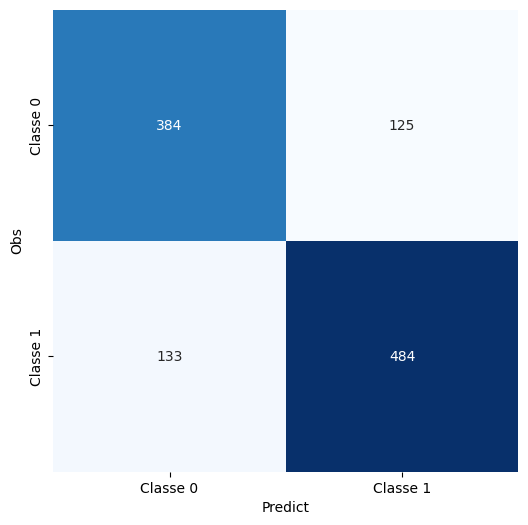

In [ ]:
preds = model.predict((X_test[cnt_features].values, X_test[cat_features].values))
y_test_classes = np.where(preds > 0.5,1,0)

from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test,y_test_classes)
print(cm)
tot = cm[0][0]+cm[1][1] + cm[0][1]+cm[1][0]
accuracy = (cm[0][0]+cm[1][1]) /tot
print("Accuracy", accuracy)
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Classe 0', 'Classe 1'], yticklabels=['Classe 0', 'Classe 1'])
plt.xlabel('Predict')
plt.ylabel('Obs')

plt.show()

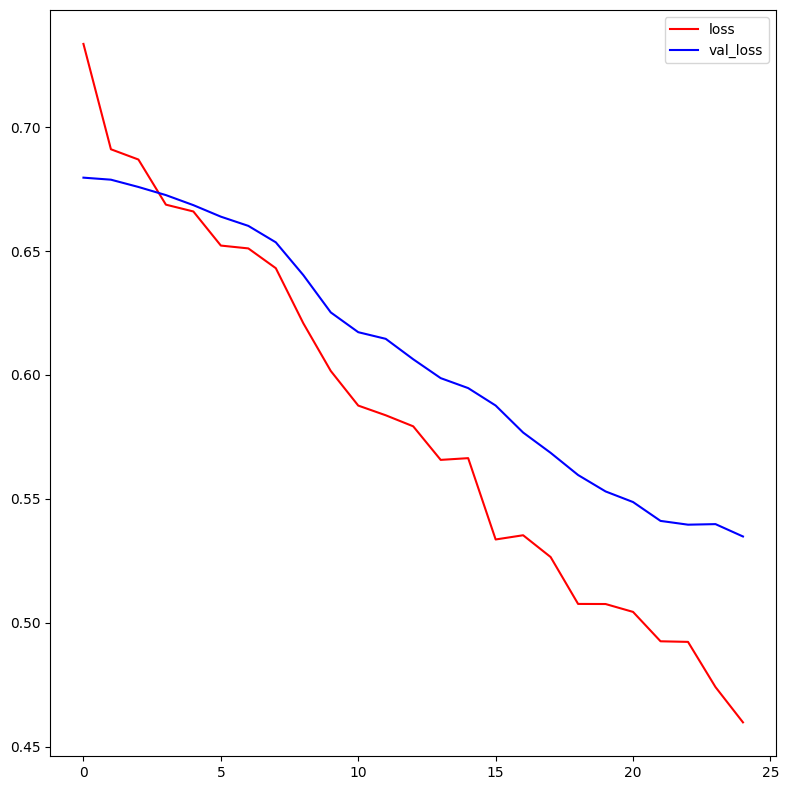

In [ ]:
plt.figure(figsize=(8, 8))
plt.plot(history.history['loss'], color='red', label='loss');
plt.plot(history.history['val_loss'], color='blue', label='val_loss');
plt.legend();
plt.tight_layout();

In [ ]:
# Calculate F1-Score
from sklearn.metrics import f1_score
f1 = f1_score(y_test, y_test_classes)
print("F1-Score:", f1)

# MCC
from sklearn.metrics import matthews_corrcoef
mcc = matthews_corrcoef(y_test, y_test_classes)
print("MCC:", mcc)

# Sensibilité :
from sklearn.metrics import recall_score
sensitivity = recall_score(y_test, y_test_classes)

print("Sensibilité", sensitivity)

# Calculate Specificity
specificity = cm[0, 0] / (cm[0, 0] + cm[0, 1])

print("Specificity:", specificity)

F1-Score: 0.7895595432300164
MCC: 0.5381762518325366
Sensibilité 0.7844408427876823
Specificity: 0.7544204322200393


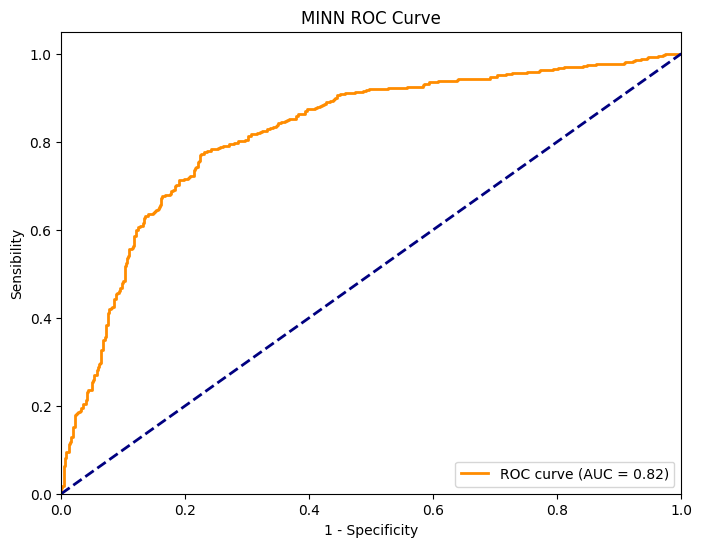

In [ ]:
# ROC curve
from sklearn.metrics import roc_curve, auc

fpr, tpr, _ = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)


plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1 - Specificity')
plt.ylabel('Sensibility')
plt.title('MINN ROC Curve')
plt.legend(loc='lower right')
plt.savefig('Figures/KAGGLE_ROC.png',  dpi=500)
plt.show()

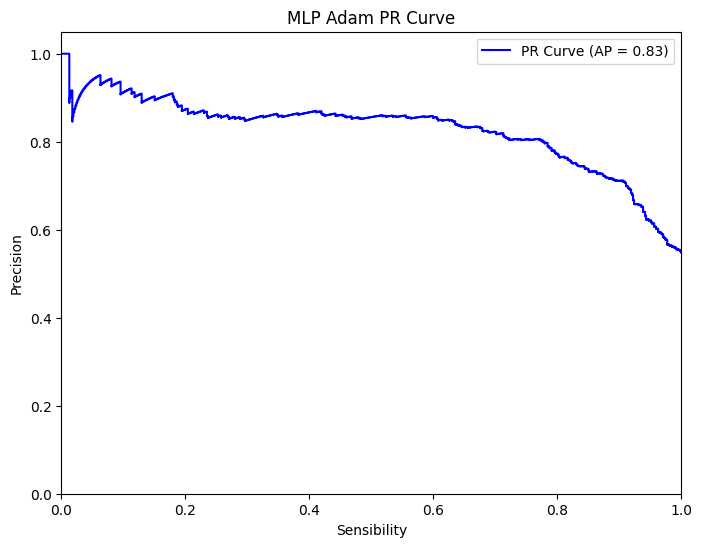

In [ ]:
# PR curve :
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score

precision, recall, _ = precision_recall_curve(y_test, preds)

average_precision = average_precision_score(y_test, preds)

# Plot PR curve
plt.figure(figsize=(8, 6))
plt.step(recall, precision, color='b', where='post', label=f'PR Curve (AP = {average_precision:.2f})')
plt.xlabel('Sensibility')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('MLP Adam PR Curve')
plt.legend(loc='upper right')
plt.show()

In [ ]:
y_pred_minn_df = pd.DataFrame(preds)
index = y_test.index
y_pred_minn_df = y_pred_minn_df.set_index(index)
y_pred_minn_df.to_csv("YPred_models/MINN.csv", index = True)

Accuracy plots

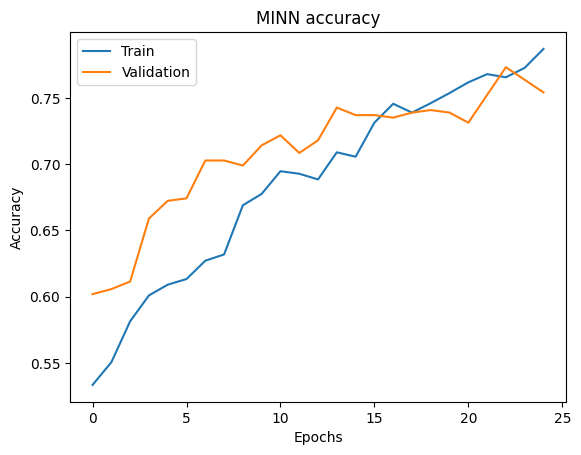

In [ ]:

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('MINN accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation', 'Early stopping'], loc='upper left')
plt.savefig('Figures/minn_acc.png',  dpi=500)
plt.show()

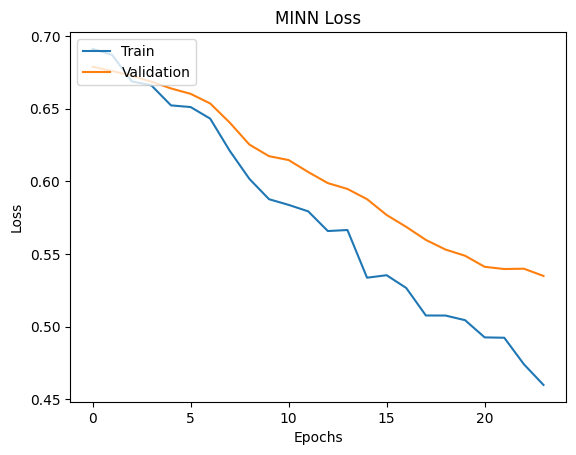

In [ ]:
# Curves loss
plt.plot(history.history['loss'][1:])
plt.plot(history.history['val_loss'][1:])
plt.title('MINN Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation', 'Early stopping'], loc='upper left')
plt.savefig('Figures/minn_loss.png',  dpi=500)
plt.show()

### Soumission Kaggle

In [ ]:
X_scaled = scaler.fit_transform(kaggle_file)
X_scaled = pd.DataFrame(X_scaled, columns = kaggle_file.columns)

preds_kaggle = model.predict((X_scaled[cnt_features].values, kaggle_file[cat_features].values))
y_pred_minn_kaggle_df = pd.DataFrame(preds_kaggle)
y_pred_minn_kaggle_df['moleculeId'] = y_pred_minn_kaggle_df.index
y_pred_minn_kaggle_df['moleculeId'] +=1
column_to_move = y_pred_minn_kaggle_df.pop("moleculeId")
y_pred_minn_kaggle_df.insert(0, "moleculeId", column_to_move)
y_pred_minn_kaggle_df.columns = ["moleculeId","PredictedProbability"]
y_pred_minn_kaggle_df.head(5)
y_pred_minn_kaggle_df.to_csv("YPred_models/MINN_kaggle.csv", index = False)

## Kaggle

In [ ]:

y_pred_CNN = pd.read_csv("pred_CNN.csv")["PredictedProbability"]

y_pred_RNN = pd.read_csv("pred_RNN.csv")["PredictedProbability"]

y_pred_adam = pd.read_csv("pred_Adam.csv")["PredictedProbability"]
y_pred_SGD = pd.read_csv("pred_SGD.csv")["PredictedProbability"]

y_pred_logistic = pd.read_csv("pred_regression.csv")["PredictedProbability"]
y_pred_grad = pd.read_csv("pred_boosting.csv")["PredictedProbability"]
y_pred_rdf = pd.read_csv("YPred_models/kaggle_random_forest.csv")["PredictedProbability"]


y_pred_MINN = pd.read_csv("YPred_models/MINN_kaggle.csv")["PredictedProbability"]
y_pred_gboost = pd.read_csv("pred_xgboost.csv")["PredictedProbability"]


# Vecteur de y_pred final :
y_pred_final = []

# Poids associé à chaque modèle
weight_logi = 0.7
weight_cnn = 0.8
weight_rdf = 2
weight_adam = 0.8
weight_sgd = 1.3
weight_rnn = 1.4
weight_grad = 1.6
weight_MINN = 0.6
weight_boost = 2

count_diff_cnn = 0
count_diff_logistic = 0
count_diff_grad = 0
count_diff_rdf = 0
count_diff_rnn = 0
count_diff_adam = 0
count_diff_sgd = 0
count_diff_MINN = 0
count_diff_boost = 0

n_models = 7

threshold = 0.56

for i in range(len(y_pred_CNN)):
        print(y_pred_CNN.loc[i])
        # Vérifier chaque prédicteur individuellement
        if y_pred_CNN.loc[i] <= threshold:
            count_diff_cnn += 1
        if y_pred_logistic.loc[i] <= threshold:
            count_diff_logistic += 1
        if y_pred_grad.loc[i] <= threshold:
            count_diff_grad += 1
        if y_pred_rdf.loc[i] <= threshold:
            count_diff_rdf += 1
        if y_pred_RNN.loc[i] <= threshold:
            count_diff_rnn += 1
        if y_pred_adam[i] <= threshold:
            count_diff_adam += 1
        if y_pred_SGD[i] <= threshold:
            count_diff_sgd += 1
        if  y_pred_MINN.loc[i]<= threshold:
            count_diff_MINN += 1
        if  y_pred_gboost[i]<= threshold:
            count_diff_boost += 1
        # print(" are < 0.5")

        molecule_mean_prob = 0

        # Do the mean for each molecule of the probability
        molecule_mean_prob+=y_pred_CNN.loc[i] * weight_cnn
        molecule_mean_prob+=y_pred_logistic.loc[i]* weight_logi
        molecule_mean_prob+=y_pred_grad.loc[i]* weight_grad
        molecule_mean_prob+=y_pred_rdf.loc[i]* weight_rdf
        molecule_mean_prob+=y_pred_RNN.loc[i]* weight_rnn

        molecule_mean_prob+=y_pred_adam[i]* weight_adam
        molecule_mean_prob+=y_pred_SGD[i]* weight_sgd
        molecule_mean_prob+=y_pred_MINN.loc[i]* weight_MINN
        molecule_mean_prob+=y_pred_gboost[i]* weight_boost

        # Mean :
        molecule_mean_prob = molecule_mean_prob/(weight_cnn + weight_logi + weight_grad + weight_rdf + weight_rnn +weight_adam + weight_sgd + weight_MINN + weight_boost)
        print(f"Mean : {molecule_mean_prob}")



        # Adding the moleule mean :
        y_pred_final.append(molecule_mean_prob)


# Performances à soumettre sur le test de kaggle :
from sklearn.preprocessing import MinMaxScaler

# Créez un dictionnaire avec les données

data = {
    'MoleculeId': [i for i in range(1,2501+1 )],
    'PredictedProbability': y_pred_final
}

# Créez un DataFrame à partir du dictionnaire
df = pd.DataFrame(data)

# Enregistrez le DataFrame au format CSV (ou tout autre format de votre choix)
df.to_csv('pred_final.csv', index=False)

Le flux de sortie a été tronqué et ne contient que les 5000 dernières lignes.
0.7972605
Mean : 0.9075632755185166
0.5959614
Mean : 0.4585010783043767
0.8555427
Mean : 0.9132063635029423
0.2403129
Mean : 0.12332918544661257
0.68835473
Mean : 0.49651672492507365
0.76312196
Mean : 0.7972618291926006
0.78870285
Mean : 0.7841896771184823
0.87781715
Mean : 0.869854468945751
0.39236945
Mean : 0.3900006073418277
0.4068187
Mean : 0.536621703934162
0.5760183
Mean : 0.6013473224626663
0.6608665
Mean : 0.6619608182408807
0.9025171
Mean : 0.6915055929564571
0.42657325
Mean : 0.41310563103177744
0.48256183
Mean : 0.3845176765223797
0.3256573
Mean : 0.12711036702085496
0.16565277
Mean : 0.129574418145308
0.2854862
Mean : 0.26564071895391517
0.35511073
Mean : 0.6354904488319552
0.25115857
Mean : 0.17442294462555305
0.9408033
Mean : 0.8725654783648394
0.6250885
Mean : 0.7064392769941517
0.9483137
Mean : 0.9176669970012733
0.92428184
Mean : 0.9245189044014452
0.49509245
Mean : 0.6164763340340969
0.23918

## Comparaison des différents modèles et construction d'un modèle final


In [ ]:
# Modèle final


# Récupérer les y_pred de tout le monde
y_pred_CNN = pd.read_csv("YPred_models/y_pred_prob_CNN_79.csv")
y_pred_RNN = pd.read_csv("YPred_models/y_pred_prob_RNN_76_final.csv")


y_pred_adam = pd.read_csv("YPred_models/y_pred_prob_adam_78_final.csv")['0'].values
y_pred_SGD = pd.read_csv("YPred_models/y_pred_prob_sgd_79_final.csv")['0'].values

y_pred_logistic = pd.read_csv("YPred_models/y_pred_prob_logistic-regression_71.csv")
y_pred_grad = pd.read_csv("YPred_models/y_pred_prob_gradient-boosting_80.csv")
y_pred_rdf = pd.read_csv("YPred_models/random_forest.csv")
y_pred_rdf = y_pred_rdf.loc[:,"1"]

y_pred_MINN = pd.read_csv("YPred_models/MINN.csv")
y_pred_MINN = y_pred_MINN.loc[:,"0"]
y_pred_gboost = pd.read_csv("YPred_models/y_pred_prob_xgboost_80.csv")['Probabilities'].values

# Vecteur de y_pred final :
y_pred_final = []

# Poids associé à chaque modèle
weight_logi = 0.7
weight_cnn = 0.8
weight_rdf = 2
weight_adam = 0.8
weight_sgd = 1.3
weight_rnn = 1.4
weight_grad = 1.6
weight_MINN = 0.6
weight_boost = 2

count_diff_cnn = 0
count_diff_logistic = 0
count_diff_grad = 0
count_diff_rdf = 0
count_diff_rnn = 0
count_diff_adam = 0
count_diff_sgd = 0
count_diff_MINN = 0
count_diff_boost = 0

n_models = 7

threshold = 0.56

for i in range(len(y_pred_CNN)):

  print(f"Molecule id : {y_pred_CNN.loc[i][0]} \t CNN {y_pred_CNN.loc[i][1]:.2f} \t logi {y_pred_logistic.loc[i][1]:.2f}\t grad {y_pred_grad.loc[i][1]:.2f}\t "+
         f"rdf {y_pred_rdf[i]:.2f}\t adam {y_pred_adam[i]:.2f}\t sgd {y_pred_SGD[i]:.2f}\t RNN {y_pred_RNN.loc[i][1]:.2f}\t MINN {y_pred_MINN.loc[i]:.2f} \t Boost {y_pred_gboost[i]:.2f}")

  if all(pred > threshold for pred in [y_pred_CNN.loc[i][1], y_pred_logistic.loc[i][1],
                                    y_pred_grad.loc[i][1], y_pred_rdf.loc[i],
                                    y_pred_RNN.loc[i][1], y_pred_adam[i], y_pred_SGD[i],  y_pred_MINN.loc[i]]) \
        or all(pred < threshold for pred in [y_pred_CNN.loc[i][1], y_pred_logistic.loc[i][1],
                                        y_pred_grad.loc[i][1], y_pred_rdf.loc[i],
                                        y_pred_RNN.loc[i][1], y_pred_adam[i], y_pred_SGD[i], y_pred_MINN.loc[i]]):
        print(f"Molecule id : {y_pred_CNN.loc[i][0]} \tToutes les prédictions sont cohérentes.")
  else:
        print(f"Molecule id : {y_pred_CNN.loc[i][0]} \tLes prédictions ne sont pas cohérentes avec les modèles suivants :")

        # Vérifier chaque prédicteur individuellement
        if y_pred_CNN.loc[i][1] <= threshold:
            count_diff_cnn += 1
        if y_pred_logistic.loc[i][1] <= threshold:
            count_diff_logistic += 1
        if y_pred_grad.loc[i][1] <= threshold:
            count_diff_grad += 1
        if y_pred_rdf.loc[i] <= threshold:
            count_diff_rdf += 1
        if y_pred_RNN.loc[i][1] <= threshold:
            count_diff_rnn += 1
        if y_pred_adam[i] <= threshold:
            count_diff_adam += 1
        if y_pred_SGD[i] <= threshold:
            count_diff_sgd += 1
        if  y_pred_MINN.loc[i]<= threshold:
            count_diff_MINN += 1
        if  y_pred_gboost[i]<= threshold:
            count_diff_boost += 1
        # print(" are < 0.5")

  molecule_mean_prob = 0

  # Do the mean for each molecule of the probability
  molecule_mean_prob+=y_pred_CNN.loc[i][1] * weight_cnn
  molecule_mean_prob+=y_pred_logistic.loc[i][1]* weight_logi
  molecule_mean_prob+=y_pred_grad.loc[i][1]* weight_grad
  molecule_mean_prob+=y_pred_rdf.loc[i]* weight_rdf
  molecule_mean_prob+=y_pred_RNN.loc[i]* weight_rnn

  molecule_mean_prob+=y_pred_adam[i]* weight_adam
  molecule_mean_prob+=y_pred_SGD[i]* weight_sgd
  molecule_mean_prob+=y_pred_MINN.loc[i]* weight_MINN
  molecule_mean_prob+=y_pred_gboost[i]* weight_boost

  # Mean :
  molecule_mean_prob = molecule_mean_prob/(weight_cnn + weight_logi + weight_grad + weight_rdf + weight_rnn +weight_adam + weight_sgd + weight_MINN + weight_boost)
  print(f"Mean : {molecule_mean_prob.iloc[1]}")



  # Adding the moleule mean :
  y_pred_final.append((y_pred_CNN.loc[i][0],molecule_mean_prob))


Molecule id : 2767.0 	 CNN 0.93 	 logi 0.81	 grad 0.87	 rdf 0.73	 adam 0.75	 sgd 0.95	 RNN 1.00	 MINN 0.76 	 Boost 0.94
Molecule id : 2767.0 	Toutes les prédictions sont cohérentes.
Mean : 0.8677453757505355
Molecule id : 2745.0 	 CNN 0.46 	 logi 0.76	 grad 0.22	 rdf 0.55	 adam 0.53	 sgd 0.74	 RNN 0.64	 MINN 0.63 	 Boost 0.31
Molecule id : 2745.0 	Les prédictions ne sont pas cohérentes avec les modèles suivants :
Mean : 0.5015711391341707
Molecule id : 660.0 	 CNN 0.96 	 logi 0.96	 grad 0.87	 rdf 0.91	 adam 0.67	 sgd 0.94	 RNN 1.00	 MINN 0.69 	 Boost 0.89
Molecule id : 660.0 	Toutes les prédictions sont cohérentes.
Mean : 0.8919905360922674
Molecule id : 2165.0 	 CNN 0.74 	 logi 0.66	 grad 0.70	 rdf 0.49	 adam 0.51	 sgd 0.39	 RNN 0.41	 MINN 0.51 	 Boost 0.71
Molecule id : 2165.0 	Les prédictions ne sont pas cohérentes avec les modèles suivants :
Mean : 0.5692488117855582
Molecule id : 2340.0 	 CNN 0.37 	 logi 0.31	 grad 0.58	 rdf 0.27	 adam 0.28	 sgd 0.21	 RNN 0.02	 MINN 0.29 	 Boost 0

In [ ]:
# Performances à soumettre sur le test de kaggle :

X_test_Kaggle = pd.read_csv("test.csv")
X_test_Kaggle = X_test_Kaggle[X_train.columns]
y_pred_test_proba = model.predict(X_test_Kaggle)


Accuracy:0.82


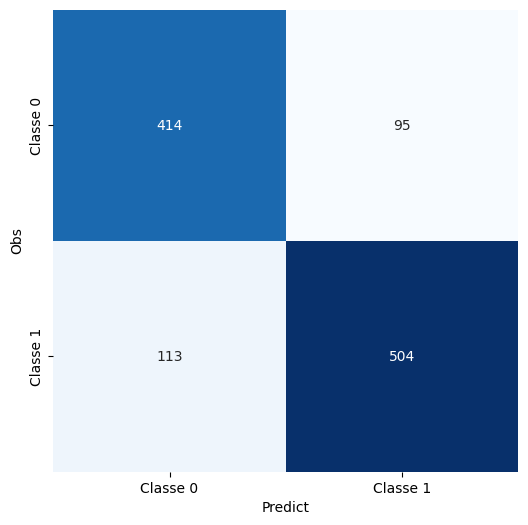

Indices des Faux Positifs : [2689, 1370, 1617, 668, 2311, 1737, 318, 818, 2398, 1013, 2683, 557, 1008, 3110, 1843, 1240, 2844, 891, 1042, 407, 2898, 325, 469, 1349, 1477, 2939, 1741, 1916, 3614, 1866, 27, 1700, 1061, 3195, 448, 3640, 2305, 2715, 1679, 3403, 3471, 2934, 2601, 1120, 188, 1386, 2792, 1014, 3039, 2121, 2032, 2548, 3001, 2872, 696, 2644, 2518, 1754, 1460, 2135, 3191, 1155, 997, 584, 2842, 3229, 3602, 1622, 3247, 3230, 1529, 1123, 2936, 544, 198, 685, 3239, 1115, 1638, 630, 312, 1275, 1483, 2246, 1879, 3552, 459, 1293, 1943, 2038, 2169, 2419, 814, 73, 573]
Indices des Faux Négatifs : [2340, 1532, 122, 2881, 1444, 3730, 2157, 293, 2949, 236, 21, 2641, 1069, 328, 691, 1901, 2174, 287, 2270, 3678, 2843, 59, 2577, 2941, 1544, 623, 2229, 654, 2029, 3028, 3310, 914, 3316, 2002, 577, 2565, 3366, 824, 3564, 3689, 3132, 211, 3570, 1821, 3169, 3655, 3699, 2244, 1913, 263, 911, 2953, 849, 3500, 976, 1757, 1501, 697, 2116, 2194, 3603, 332, 1602, 2348, 3174, 2638, 3528, 2062, 3016, 2336,

In [ ]:
# Matrice de confusion finale :
y_test = pd.read_csv("y_test_30.csv")
indices_test = y_test["Unnamed: 0"]
y_test = pd.read_csv("y_test_30.csv", index_col=0)


# Extracting only the proba from the molecules ids
y_pred_final_prob = [y_pred_final[i][1] for i in range(len(y_pred_final))]
# Final 0/1 prediction :
y_pred_final_class  = [1 if y_pred_final_prob[i][1] >=threshold else 0 for i in range(len(y_pred_final_prob))]

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred_final_class)
tot = cm[0][0]+cm[1][1] + cm[0][1]+cm[1][0]
accuracy = (cm[0][0]+cm[1][1]) /tot
print(f"Accuracy:{accuracy:.2f}")
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Classe 0', 'Classe 1'], yticklabels=['Classe 0', 'Classe 1'])
plt.xlabel('Predict')
plt.ylabel('Obs')
plt.show()


# Extraire les indices des faux positifs et des faux négatifs
faux_positifs = []
faux_negatifs = []

for i in range(len(indices_test)):
    indice_pred = indices_test[i]

    # Faux Positif : Vraie classe 0, Prédite classe 1
    if y_test.loc[indice_pred].item() == 0 and y_pred_final_class[i] == 1:
        faux_positifs.append(indice_pred)
    # Faux Négatif : Vraie classe 1, Prédite classe 0
    elif y_test.loc[indice_pred].item() == 1 and y_pred_final_class[i] == 0:
        faux_negatifs.append(indice_pred)

print("Indices des Faux Positifs :", faux_positifs)
print("Indices des Faux Négatifs :", faux_negatifs)


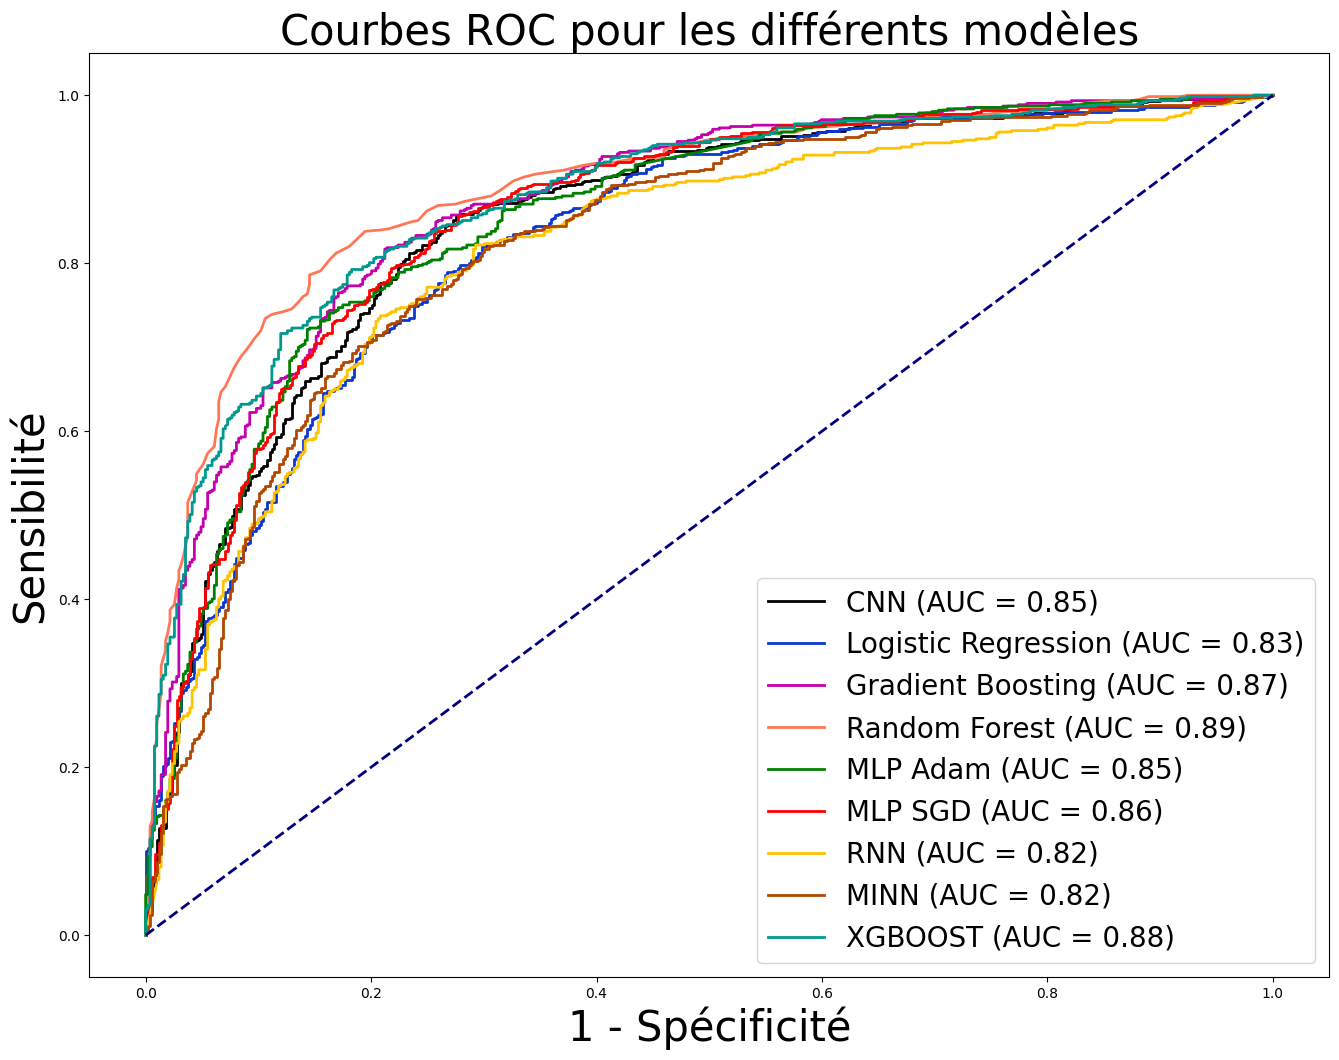

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# COURBES ROC
y_pred_CNN = pd.read_csv("YPred_models/y_pred_prob_CNN_79.csv")['0'].values
y_pred_logistic = pd.read_csv("YPred_models/y_pred_prob_logistic-regression_71.csv")['Probabilities'].values
y_pred_grad = pd.read_csv("YPred_models/y_pred_prob_gradient-boosting_80.csv")['Probabilities'].values
y_pred_rdf = pd.read_csv("YPred_models/random_forest.csv")['1'].values
y_pred_adam = pd.read_csv("YPred_models/y_pred_prob_adam_78_final.csv")['0'].values
y_pred_SGD = pd.read_csv("YPred_models/y_pred_prob_sgd_79_final.csv")['0'].values
y_pred_RNN = pd.read_csv("YPred_models/y_pred_prob_RNN_76_final.csv")['0'].values
y_pred_MINN = pd.read_csv("YPred_models/MINN.csv")
y_pred_MINN = y_pred_MINN.loc[:,"0"]
y_pred_gboost = pd.read_csv("YPred_models/y_pred_prob_xgboost_80.csv")['Probabilities'].values


y_true = pd.read_csv("y_test_30.csv", index_col=0)

fpr_CNN, tpr_CNN, _ = roc_curve(y_true, y_pred_CNN)
fpr_logistic, tpr_logistic, _ = roc_curve(y_true, y_pred_logistic)
fpr_grad, tpr_grad, _ = roc_curve(y_true, y_pred_grad)
fpr_rdf, tpr_rdf, _ = roc_curve(y_true, y_pred_rdf)
fpr_adam, tpr_adam, _ = roc_curve(y_true, y_pred_adam)
fpr_sgd, tpr_sgd, _ = roc_curve(y_true, y_pred_SGD)
fpr_RNN, tpr_RNN, _ = roc_curve(y_true, y_pred_RNN)
fpr_MINN, tpr_MINN, _ = roc_curve(y_true, y_pred_MINN)
fpr_boost, tpr_boost, _ = roc_curve(y_true, y_pred_gboost)

roc_auc_CNN = auc(fpr_CNN, tpr_CNN)
roc_auc_logistic = auc(fpr_logistic, tpr_logistic)
roc_auc_grad = auc(fpr_grad, tpr_grad)
roc_auc_rdf = auc(fpr_rdf, tpr_rdf)
roc_auc_adam = auc(fpr_adam, tpr_adam)
roc_auc_sgd = auc(fpr_sgd, tpr_sgd)
roc_auc_RNN = auc(fpr_RNN, tpr_RNN)
roc_auc_MINN = auc(fpr_MINN, tpr_MINN)
roc_auc_boost = auc(fpr_boost, tpr_boost)

plt.figure(figsize=(16, 12))
plt.plot(fpr_CNN, tpr_CNN, color='black', lw=2, label=f'CNN (AUC = {roc_auc_CNN:.2f})')
plt.plot(fpr_logistic, tpr_logistic, color='#0B37D1', lw=2, label=f'Logistic Regression (AUC = {roc_auc_logistic:.2f})')
plt.plot(fpr_grad, tpr_grad, color='#C500AF', lw=2, label=f'Gradient Boosting (AUC = {roc_auc_grad:.2f})')
plt.plot(fpr_rdf, tpr_rdf, color='#FF7757', lw=2, label=f'Random Forest (AUC = {roc_auc_rdf:.2f})')
plt.plot(fpr_adam, tpr_adam, color='green', lw=2, label=f'MLP Adam (AUC = {roc_auc_adam:.2f})')
plt.plot(fpr_sgd, tpr_sgd, color='red', lw=2, label=f'MLP SGD (AUC = {roc_auc_sgd:.2f})')
plt.plot(fpr_RNN, tpr_RNN, color='#FFC300', lw=2, label=f'RNN (AUC = {roc_auc_RNN:.2f})')
plt.plot(fpr_MINN, tpr_MINN, color='#B34700', lw=2, label=f'MINN (AUC = {roc_auc_MINN:.2f})')
plt.plot(fpr_boost, tpr_boost, color='#00998F', lw=2, label=f'XGBOOST (AUC = {roc_auc_boost:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('1 - Spécificité', fontsize=30)
plt.ylabel('Sensibilité', fontsize=30)
plt.title('Courbes ROC pour les différents modèles', fontsize=30)
plt.legend(loc='lower right',  fontsize=20)
plt.savefig('Figures/ALL_ROC_CURVES.png',  dpi=1000)
plt.show()


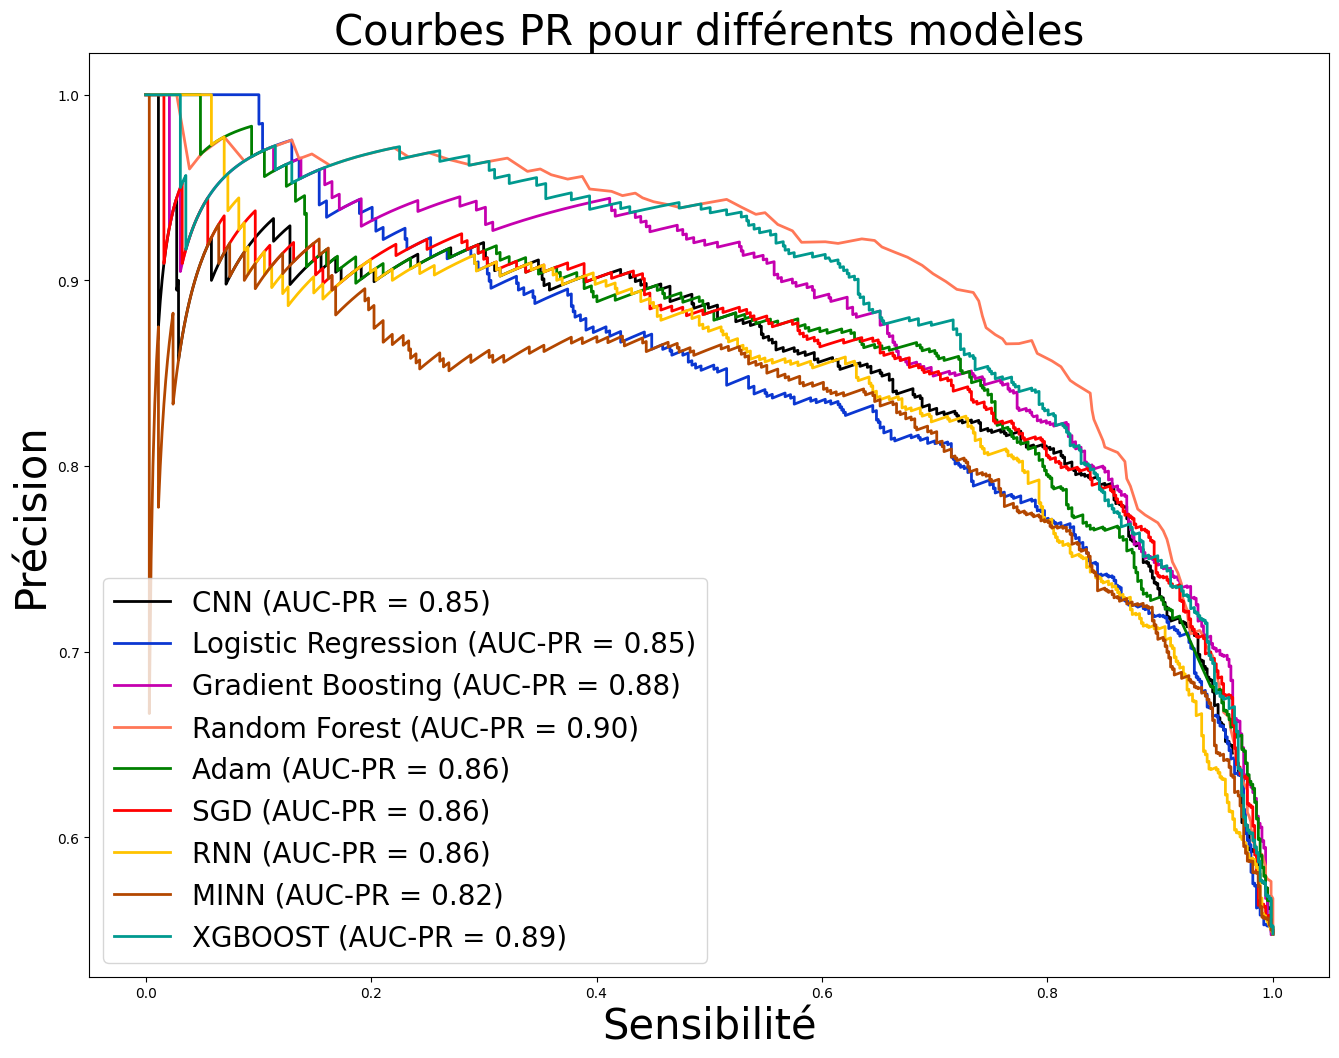

In [ ]:
#PR Curve
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, auc


y_pred_CNN = pd.read_csv("YPred_models/y_pred_prob_CNN_79.csv")['0'].values
y_pred_logistic = pd.read_csv("YPred_models/y_pred_prob_logistic-regression_71.csv")['Probabilities'].values
y_pred_grad = pd.read_csv("YPred_models/y_pred_prob_gradient-boosting_80.csv")['Probabilities'].values
y_pred_gboost = pd.read_csv("YPred_models/y_pred_prob_xgboost_80.csv")['Probabilities'].values

y_pred_rdf = pd.read_csv("YPred_models/random_forest.csv")['1'].values
y_pred_adam = pd.read_csv("YPred_models/y_pred_prob_adam_78_final.csv")['0'].values
y_pred_SGD = pd.read_csv("YPred_models/y_pred_prob_sgd_79_final.csv")['0'].values
y_pred_RNN = pd.read_csv("YPred_models/y_pred_prob_RNN_76.csv")['0'].values
y_pred_MINN = pd.read_csv("YPred_models/MINN.csv")
y_pred_MINN = y_pred_MINN.loc[:,"0"]

y_true = pd.read_csv("y_test_30.csv", index_col=0)

precision_CNN, recall_CNN, _ = precision_recall_curve(y_true, y_pred_CNN)
precision_logistic, recall_logistic, _ = precision_recall_curve(y_true, y_pred_logistic)
precision_grad, recall_grad, _ = precision_recall_curve(y_true, y_pred_grad)
precision_rdf, recall_rdf, _ = precision_recall_curve(y_true, y_pred_rdf)
precision_adam, recall_adam, _ = precision_recall_curve(y_true, y_pred_adam)
precision_SGD, recall_SGD, _ = precision_recall_curve(y_true, y_pred_SGD)
precision_RNN, recall_RNN, _ = precision_recall_curve(y_true, y_pred_RNN)
precision_MINN, recall_MINN, _ = precision_recall_curve(y_true, y_pred_MINN)
precision_boost, recall_boost, _ = precision_recall_curve(y_true, y_pred_gboost)

pr_auc_CNN = auc(recall_CNN, precision_CNN)
pr_auc_logistic = auc(recall_logistic, precision_logistic)
pr_auc_grad = auc(recall_grad, precision_grad)
pr_auc_rdf = auc(recall_rdf, precision_rdf)
pr_auc_adam = auc(recall_adam, precision_adam)
pr_auc_SGD = auc(recall_SGD, precision_SGD)
pr_auc_RNN= auc(recall_RNN, precision_RNN)
pr_auc_MINN= auc(recall_MINN, precision_MINN)
pr_auc_boost= auc(recall_boost, precision_boost)


plt.figure(figsize=(16, 12))
plt.plot(recall_CNN, precision_CNN, color='black', lw=2, label=f'CNN (AUC-PR = {pr_auc_CNN:.2f})')
plt.plot(recall_logistic, precision_logistic, color='#0B37D1', lw=2, label=f'Logistic Regression (AUC-PR = {pr_auc_logistic:.2f})')
plt.plot(recall_grad, precision_grad, color='#C500AF', lw=2, label=f'Gradient Boosting (AUC-PR = {pr_auc_grad:.2f})')
plt.plot(recall_rdf, precision_rdf, color='#FF7757', lw=2, label=f'Random Forest (AUC-PR = {pr_auc_rdf:.2f})')
plt.plot(recall_adam, precision_adam, color='green', lw=2, label=f'Adam (AUC-PR = {pr_auc_adam:.2f})')
plt.plot(recall_SGD, precision_SGD, color='red', lw=2, label=f'SGD (AUC-PR = {pr_auc_SGD:.2f})')
plt.plot(recall_RNN, precision_RNN, color='#FFC300', lw=2, label=f'RNN (AUC-PR = {pr_auc_SGD:.2f})')
plt.plot(recall_MINN, precision_MINN, color='#B34700', lw=2, label=f'MINN (AUC-PR = {pr_auc_MINN:.2f})')
plt.plot(recall_boost, precision_boost, color='#00998F', lw=2, label=f'XGBOOST (AUC-PR = {pr_auc_boost:.2f})')

plt.xlabel('Sensibilité', fontsize=30)
plt.ylabel('Précision', fontsize=30)
plt.title('Courbes PR pour différents modèles', fontsize=30)
plt.legend(loc='lower left',  fontsize=20)
plt.savefig('Figures/ALL_PR_CURVES.png',  dpi=1000)
plt.show()


In [ ]:
# ROC curve du modèle complet
from sklearn.metrics import roc_curve, auc

fpr, tpr, _ = roc_curve(y_test, y_pred_final_prob)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1 - Specificity')
plt.ylabel('Sensibility')
plt.title('CNN ROC Curve')
plt.legend(loc='lower right')
plt.savefig('Figures/CNN_78_ROC.png',  dpi=500)
plt.show()

In [ ]:
# PR curve du modèle complet :
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score

precision, recall, _ = precision_recall_curve(y_test, y_pred_final_prob)

average_precision = average_precision_score(y_test, y_pred_final_prob)

# Plot PR curve
plt.figure(figsize=(8, 6))
plt.step(recall, precision, color='b', where='post', label=f'PR Curve (AP = {average_precision:.2f})')
plt.xlabel('Sensibility')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('PR Curve')
plt.legend(loc='upper right')
plt.show()

In [ ]:
# Calculate F1-Score
from sklearn.metrics import f1_score
f1 = f1_score(y_test, y_pred_final_class)
print("F1-Score:", f1)

F1-Score: 0.8069644208932626


In [ ]:
# MCC
from sklearn.metrics import matthews_corrcoef
mcc = matthews_corrcoef(y_test, y_pred_final_class)
print("MCC:", mcc)

MCC: 0.542768085345847
